# Import

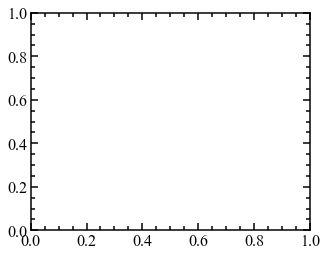

In [1]:
import sys
sys.dont_write_bytecode = True
import time
import numpy as np
from qutip import*
from matplotlib import pyplot as plt
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
import plotting_settings
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'

# Parameters

In [2]:
nlev_lc = 30
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False

if not take_data_from_input_file:
    # Parameters of the first fluxonium.
    E_L1 = 0.9  # inductive energy
    E_C1 = 1.0  # charging energy
    E_J1 = 4  # Josephson energy
    phi_ext1 = np.pi  # external phase shift

    # Parameters of the second fluxonium.
    E_L2 = 1  # inductive energy
    E_C2 = 1.0  # charging energy
    E_J2 = 4  # Josephson energy
    phi_ext2 = np.pi  # external phase shift

    # Interaction energy between two fluxoniums.
    # E_int n_1 n_2 or E_int phi_1 phi_2.
    E_int = 0.27  # when a single value is needed
    E_int_range = np.linspace(0, 0.3, 11)  # when a range is needed
    coupling = 'charge'  # 'charge' or 'flux'

qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
print("Qubit A: %s" % (qubit1))
print("Qubit B: %s" % (qubit2))
anchor_freqA = qubit1.freq(0,1)
anchor_freqB = qubit2.freq(0,1)
freq_anchor = anchor_freqB - anchor_freqA
print (anchor_freqA)
print (anchor_freqB)
print (anchor_freqB - anchor_freqA)
print (qubit1.phi_ij(0,1))
print (qubit2.phi_ij(0,1))
print (0.002*2.585139799911089 *2.1310128828105026 )

Qubit A: A fluxonium qubit with E_L = 0.9 GHz, E_C = 1.0 GHz, and E_J = 4 GHz. The external phase shift is phi_ext/pi = 1.0.
Qubit B: A fluxonium qubit with E_L = 1 GHz, E_C = 1.0 GHz, and E_J = 4 GHz. The external phase shift is phi_ext/pi = 1.0.
0.49991013194227407
0.5818489871377732
0.08193885519549915
(2.214944375431104+0j)
(-2.1310128828105026+0j)
0.011017932434953392


# Uncoupled qubits
## Spectra, matrix elements

In [3]:
phi_pts = np.linspace(0, 1, 101)*np.pi*2
energies1 = np.zeros((nlev_single, len(phi_pts)))
energies2 = np.zeros_like(energies1)
n1_01 = np.zeros_like(phi_pts, dtype = complex)
n2_01 = np.zeros_like(phi_pts, dtype = complex)
phi1_01 = np.zeros_like(phi_pts, dtype = complex)
phi2_01 = np.zeros_like(phi_pts, dtype = complex)

for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    energies1[:, iphi] = qubit1.levels(nlev=nlev_single)
    energies2[:, iphi] = qubit2.levels(nlev=nlev_single)
    n1_01[iphi] = qubit1.n_ij(level1=0,level2=1)
    n2_01[iphi] = qubit2.n_ij(level1=0,level2=1)
    phi1_01[iphi] = qubit1.phi_ij(level1=0,level2=1)
    phi2_01[iphi] = qubit2.phi_ij(level1=0,level2=1)

Text(0, 0.5, 'Frequency (GHz)')

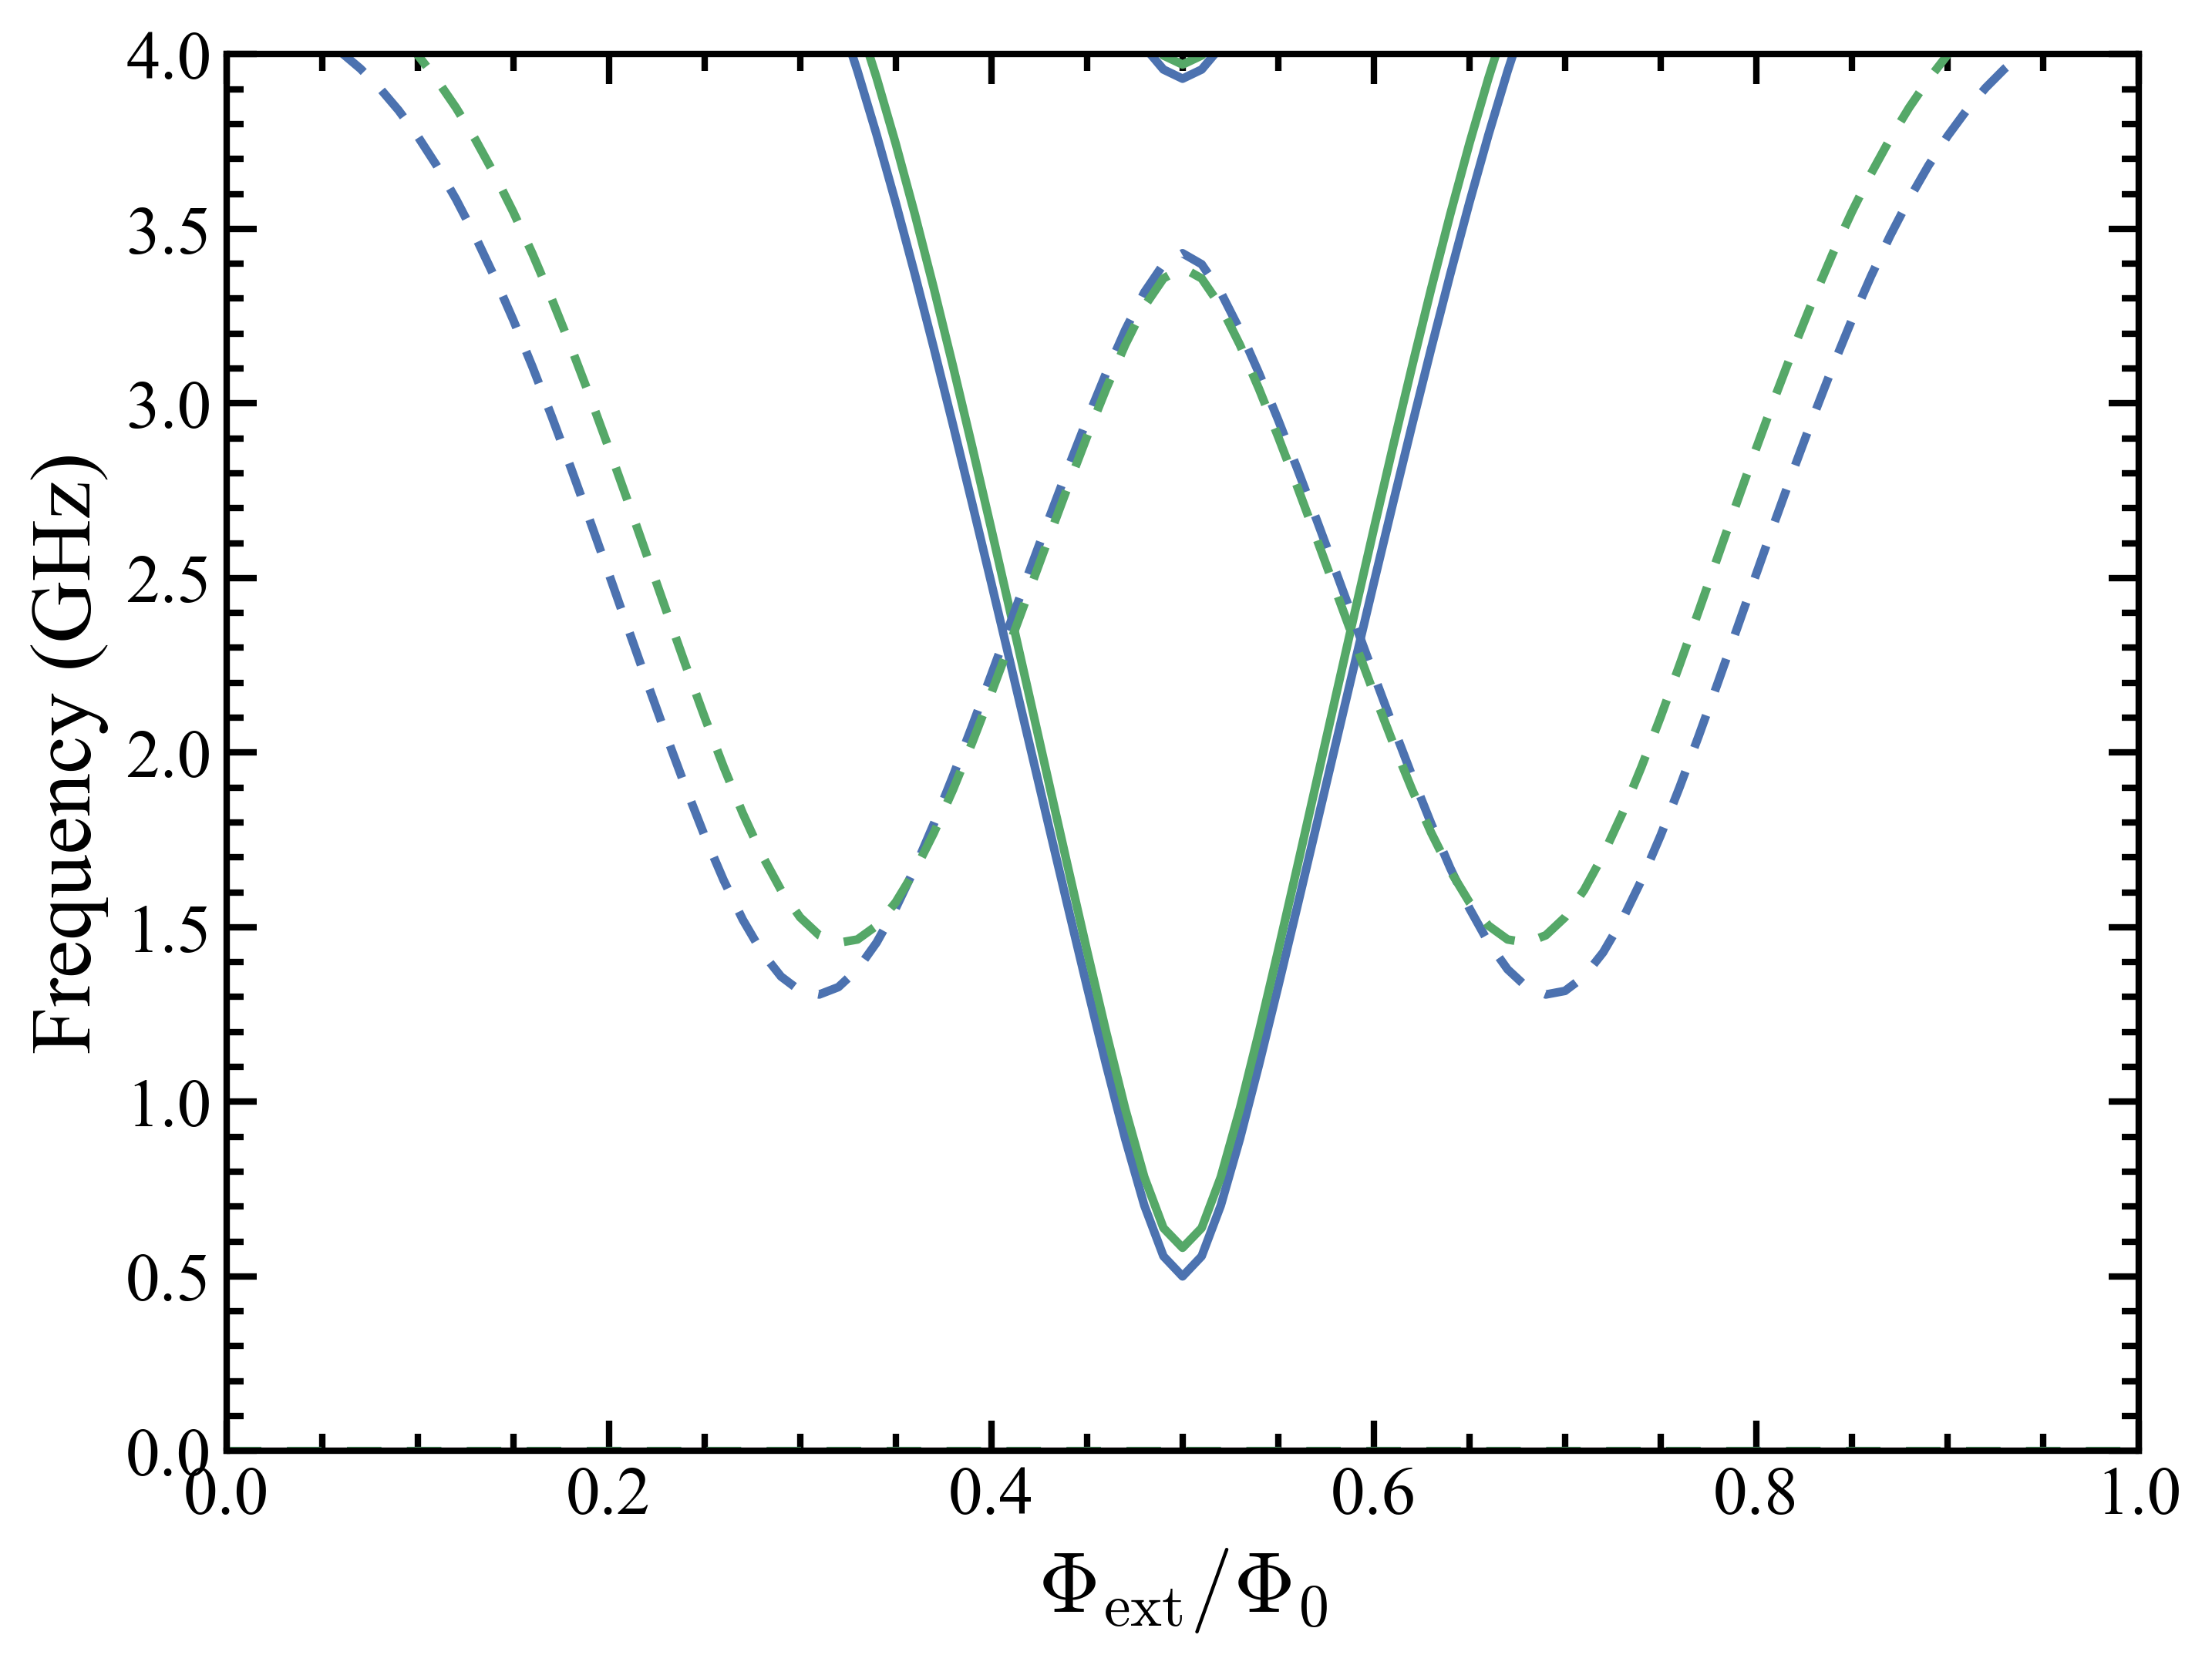

In [4]:
plt.figure(figsize = [8,6])
for idx in range(1,7):
    plt.plot(phi_pts/(np.pi*2), energies1[idx, :] - energies1[0, :], color='C0')
    plt.plot(phi_pts/(np.pi*2), energies2[idx, :] - energies2[0, :], color='C1')
    plt.plot(phi_pts/(np.pi*2), energies1[idx, :] - energies1[1, :], linestyle = '--', color='C0')
    plt.plot(phi_pts/(np.pi*2), energies2[idx, :] - energies2[1, :], linestyle = '--', color='C1')
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 4])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')

2.214944375431104
2.1310128828105026
0.5752780750738494
0.5805605710356995


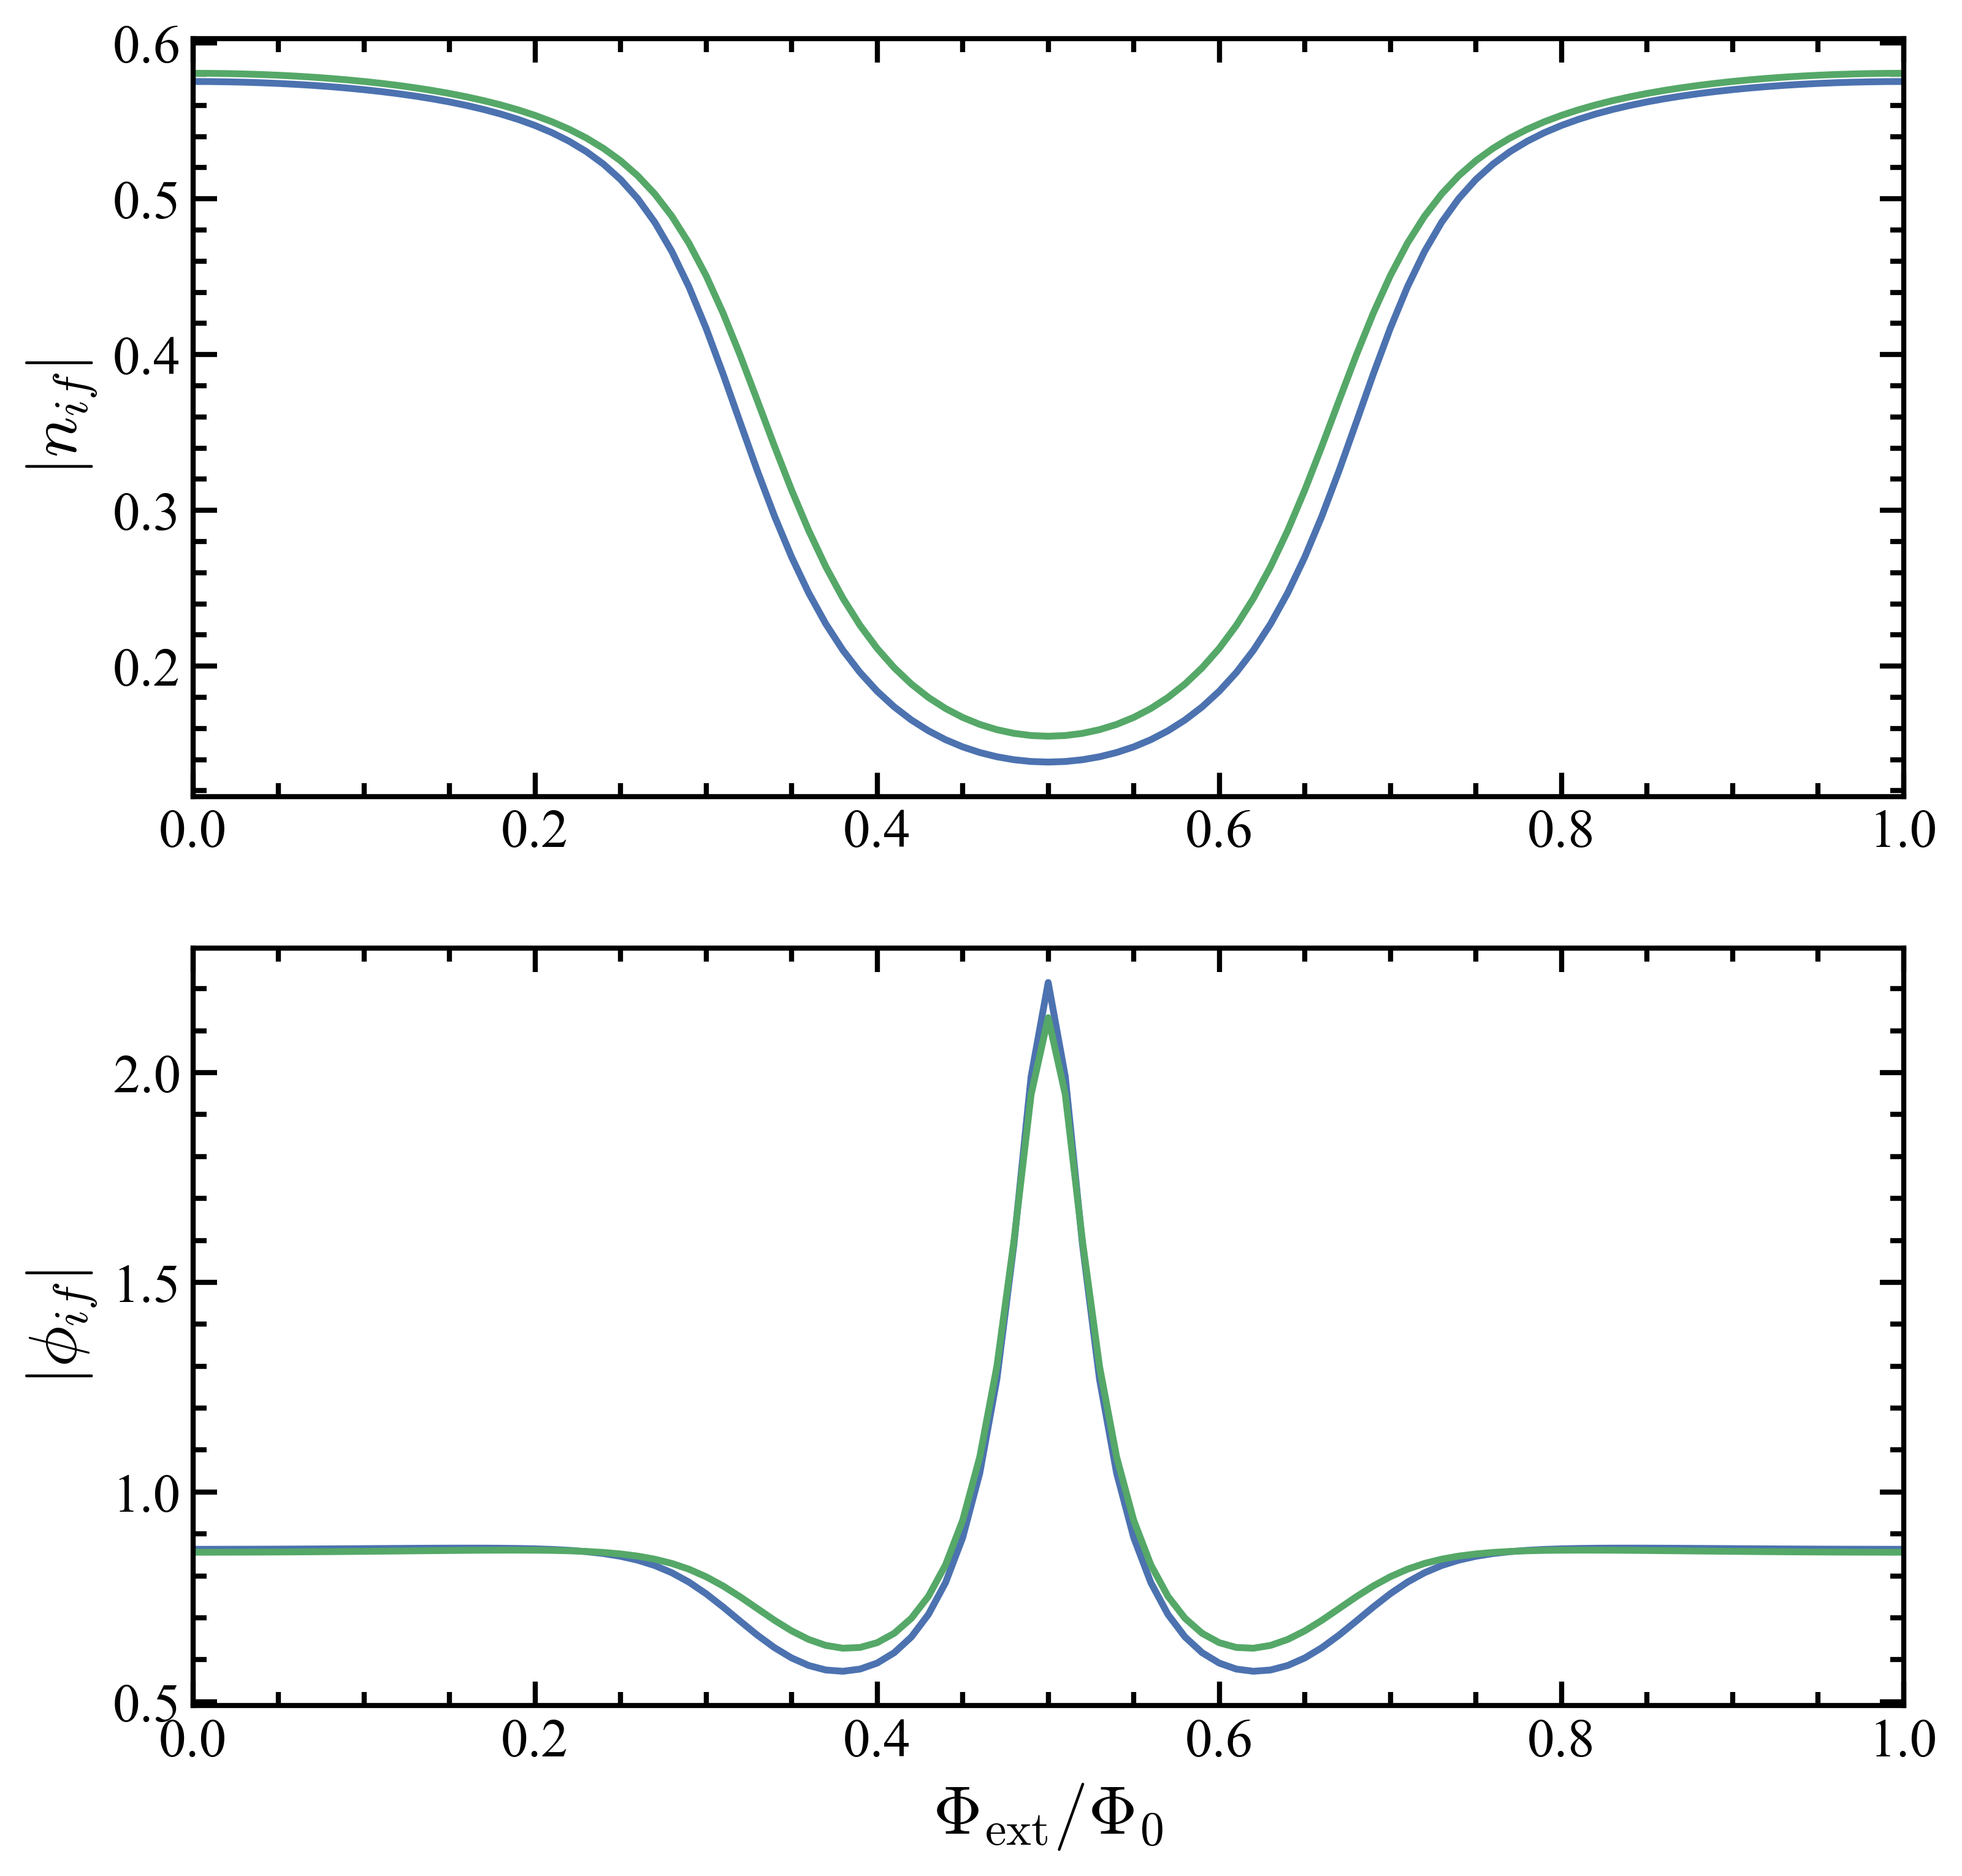

In [5]:
fig, (ax1, ax2) = plt.subplots(2, figsize=[9,9])
ax1.set_xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
ax2.set_xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
ax2.set_xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
ax1.set_ylabel(r'$|n_{if}|$')
ax2.set_ylabel(r'$|\phi_{if}|$')
ax1.plot(phi_pts/(np.pi*2), abs(n1_01))
ax1.plot(phi_pts/(np.pi*2), abs(n2_01))
ax2.plot(phi_pts/(np.pi*2), abs(phi1_01))
ax2.plot(phi_pts/(np.pi*2), abs(phi2_01))

print (np.max(abs(phi1_01)))
print (np.max(abs(phi2_01)))
print (np.max(abs(n1_01)))
print (np.max(abs(n2_01)))

# Interacting systems
## Charge coupling
### Sweep flux

In [167]:
#Sweep flux with fixed coupling
coupling_type = 'charge'
E_int = 0.2 #GHz
nlev_show = 15  # The number of two-qubit levels to show.
energies_coupled_sflux = np.zeros((len(phi_pts),nlev_show))
for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    energies_coupled_sflux[iphi, :] = system.levels()[:nlev_show]

Text(0, 0.5, 'Frequency (GHz)')

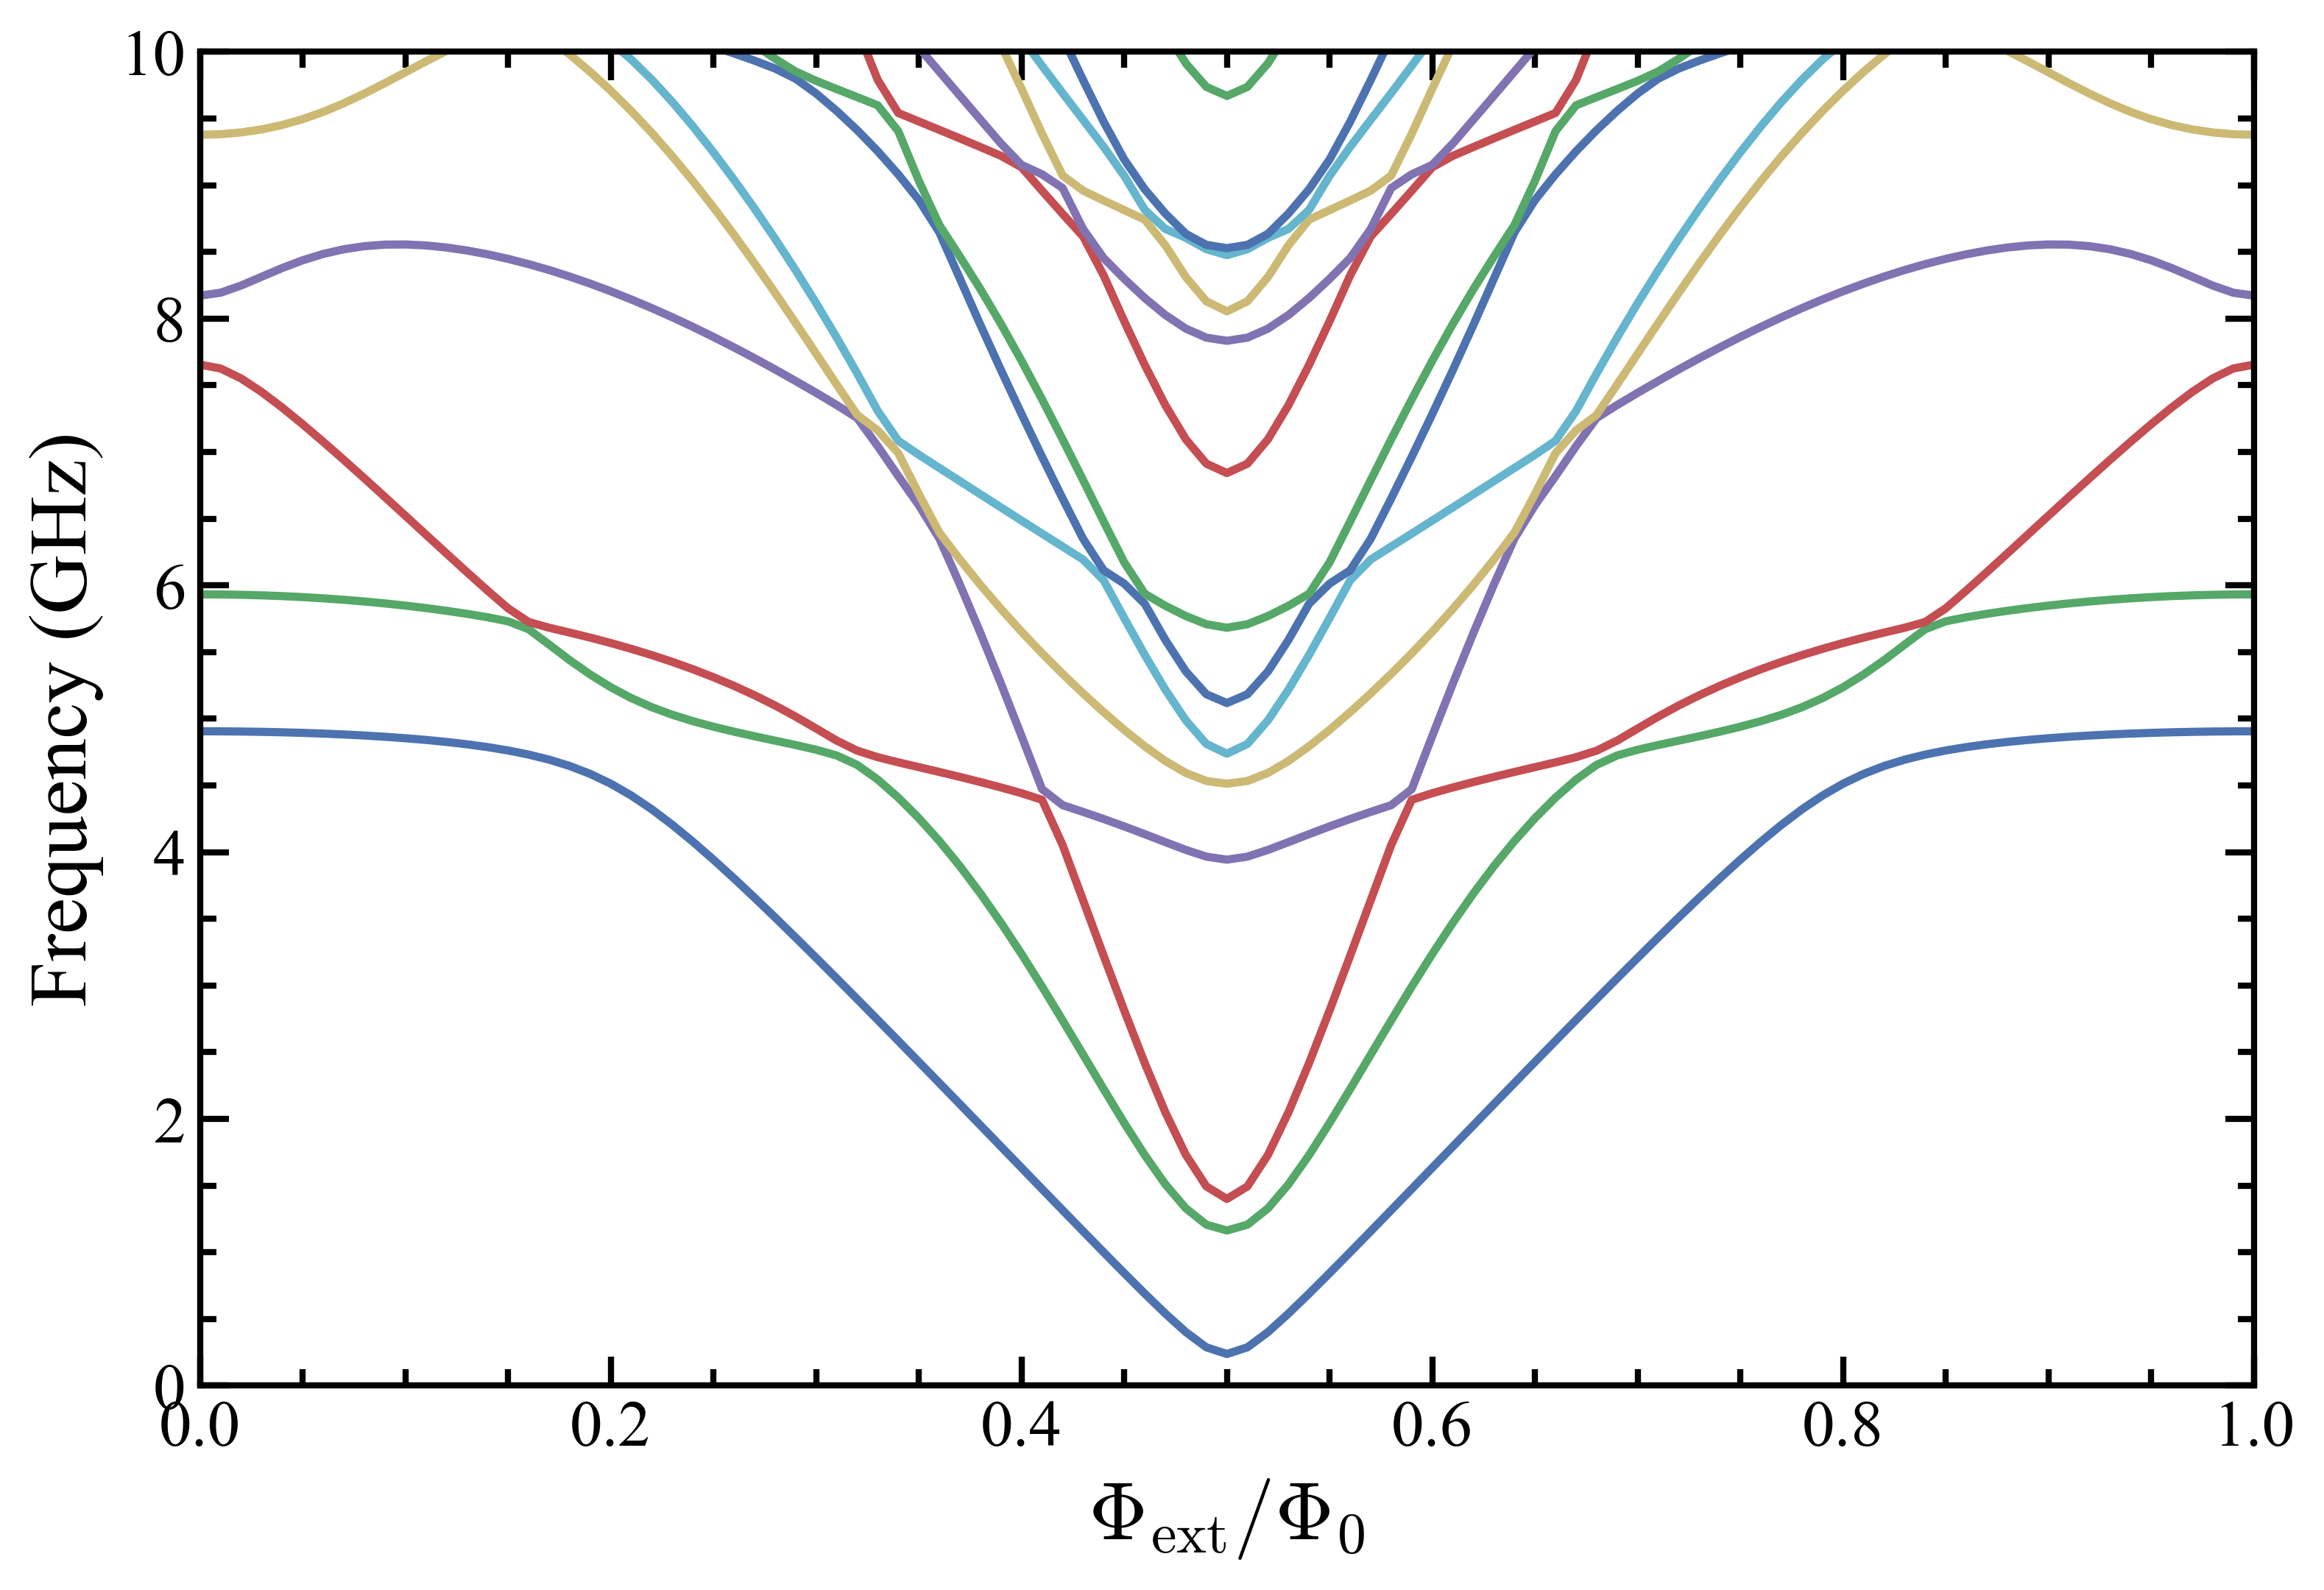

In [168]:
plt.figure(figsize = [9,6])
for idx in range(1, nlev_show):
    plt.plot(phi_pts/(np.pi*2), energies_coupled_sflux[:,idx] - energies_coupled_sflux[:,0])
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 10])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')

### Sweep coupling

In [176]:
#Sweep the coupling strength, charge
J_C_array = np.linspace(0, 0.4, 41)
phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
print (qubit1.n_ij(level1=0,level2=1))
print (qubit2.n_ij(level1=0,level2=1))
print (qubit1.phi_ij(level1=0,level2=1))
print (qubit2.phi_ij(level1=0,level2=1))
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev, len(J_C_array)))
mCharge_element_flux1 = np.zeros_like(J_C_array)
mCharge_element_flux2 = np.zeros_like(J_C_array)
for idx, J_C in enumerate(J_C_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_C, 'charge'])
    energies_coupled_swE[:,idx] = system.levels()
    mCharge_element_flux1[idx] = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('10')))
    mCharge_element_flux2[idx] = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('01')))
    

-0.13840915072151933j
0.15499096742540563j
(2.214944375431104+0j)
(-2.1310128828105026+0j)


(0.0, 0.4)

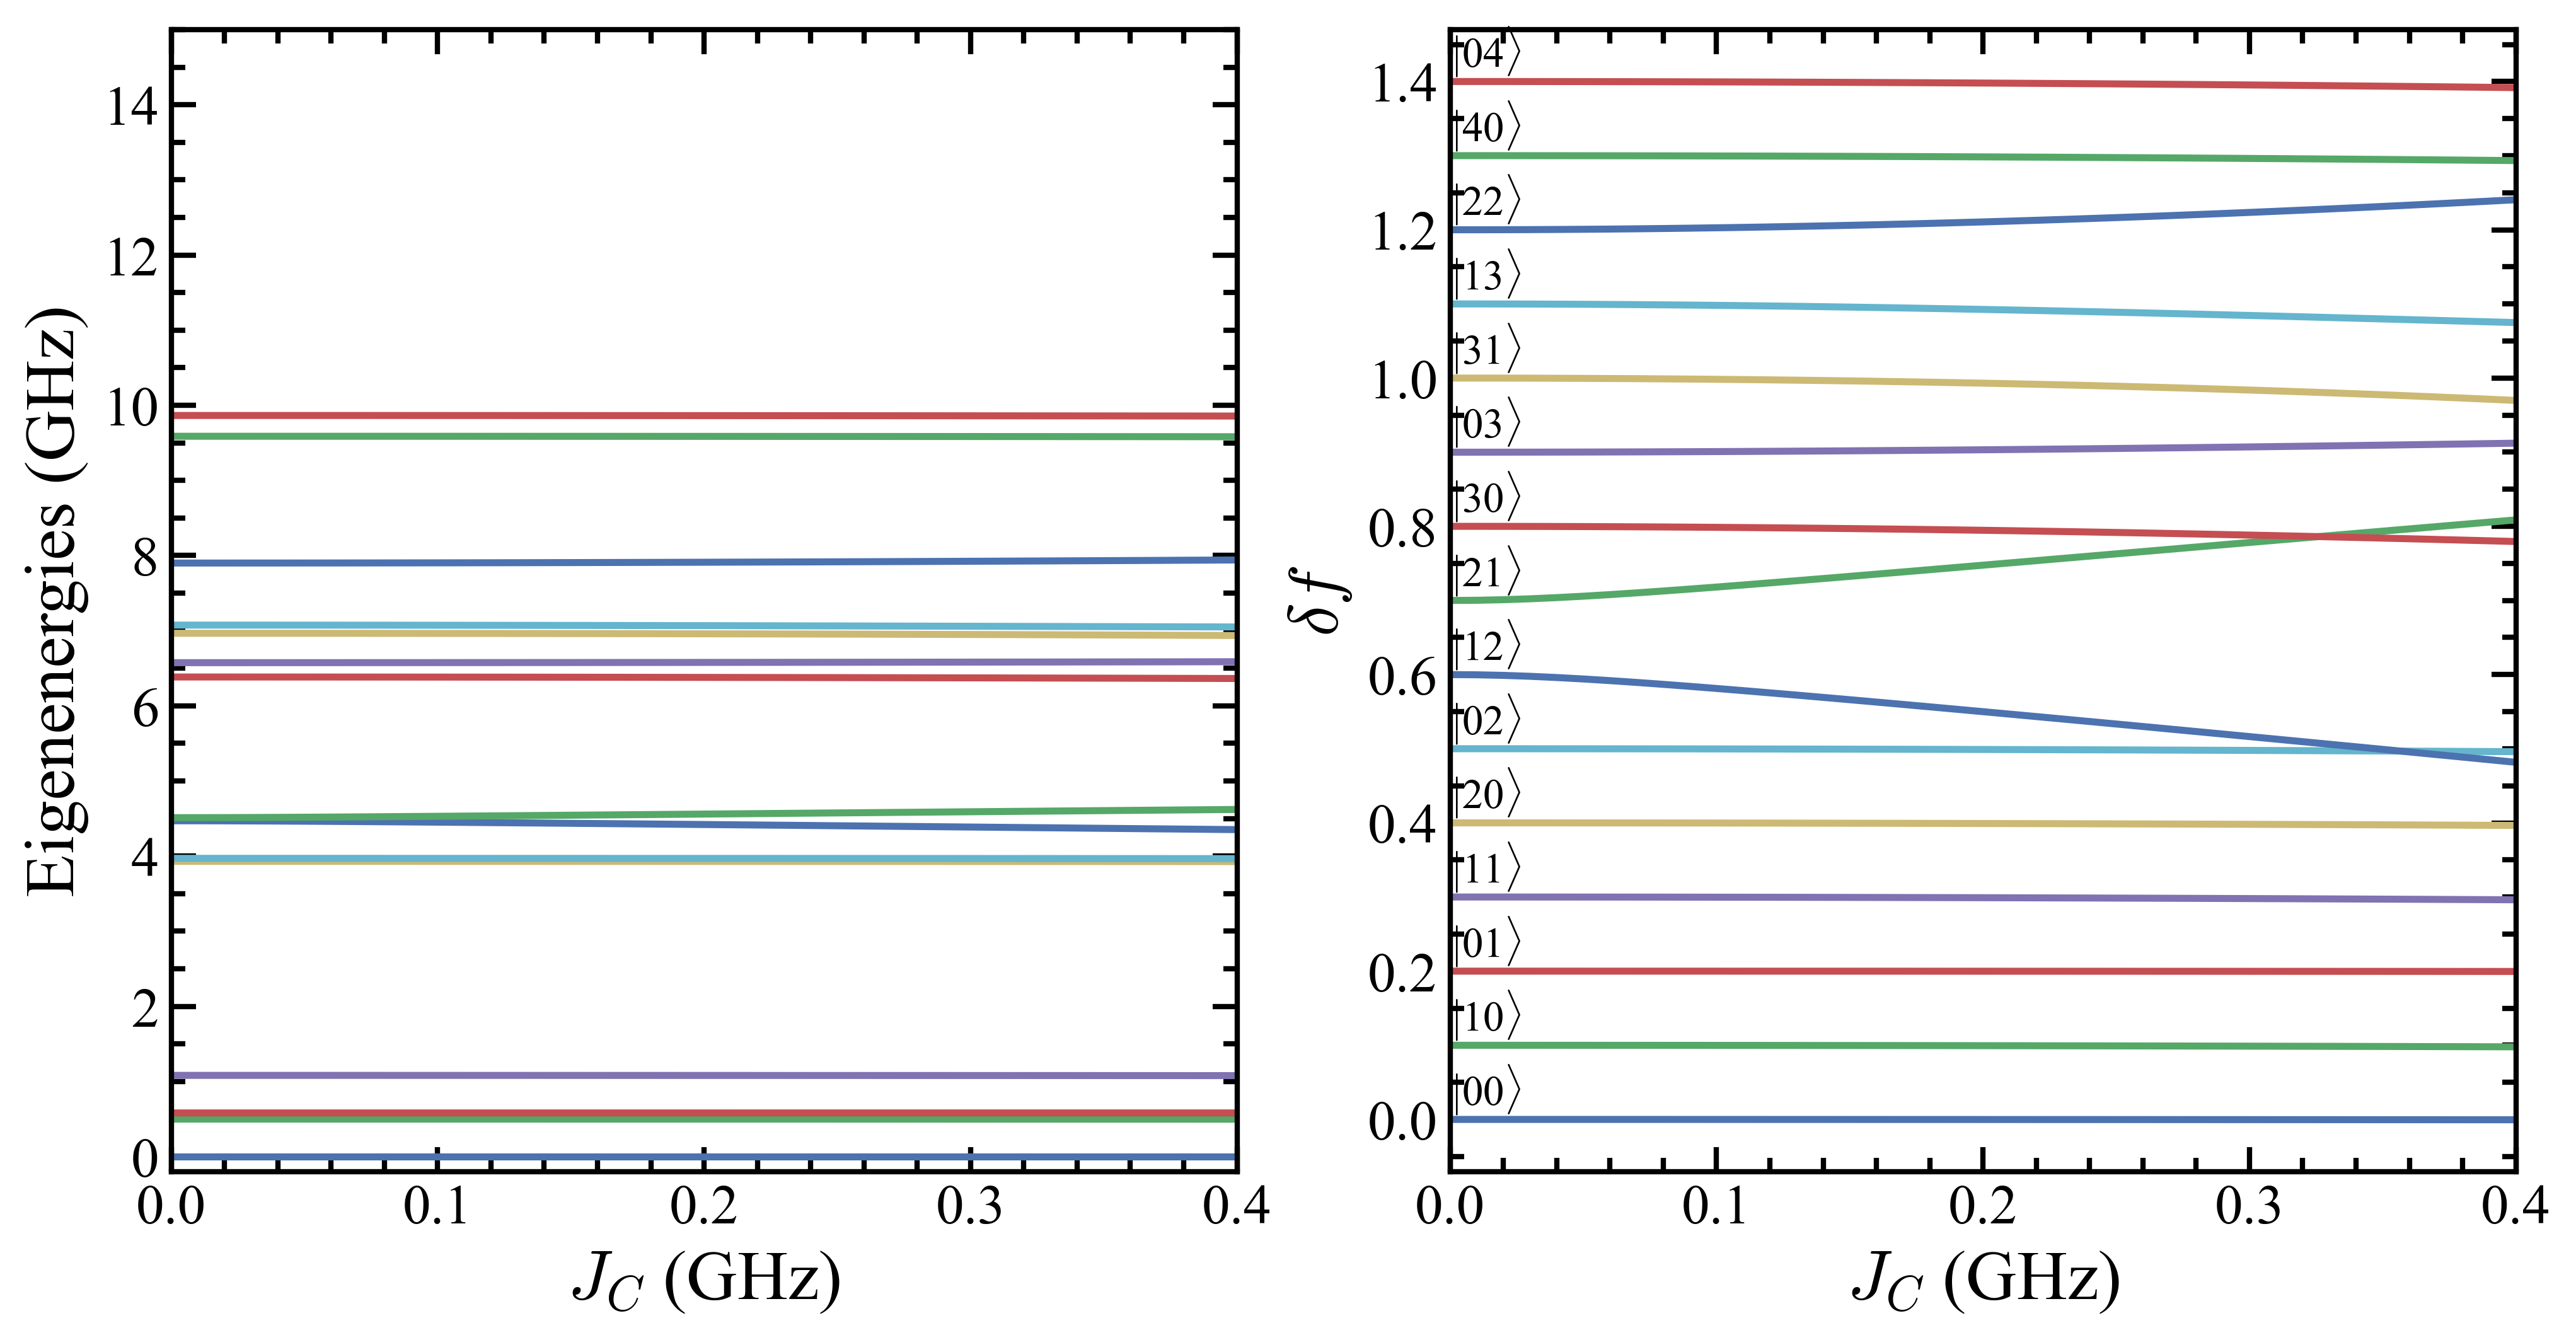

In [177]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,6])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

#Transition freqs
for idx in range(0, nlev_show):
    ax1.plot(J_C_array, energies_coupled_swE[idx, :]-energies_coupled_swE[0, :], linewidth = 2.0)
ax1.set_xlabel('$J_C$ (GHz)')
ax1.set_ylabel('Eigenenergies (GHz)')
ax1.set_xlim([J_C_array[0], J_C_array[-1]])
ax1.set_ylim([-0.2,15])

#State labeling
for idx in range(0, nlev_show):
    ax2.plot(J_C_array, 0.1 * idx+(energies_coupled_swE[idx, :]-energies_coupled_swE[idx, 0]), linewidth = 2.0)
    label = (r'$|$' + system.level_label(idx, label_format='str') + r'$\rangle$')
    ax2.text(0, 0.02 + 0.1 * idx, label, fontsize=12)
ax2.set_xlabel('$J_C$ (GHz)')
ax2.set_ylabel(r'$\delta f$')
ax2.set_xlim([J_C_array[0],J_C_array[-1]])

In [179]:
#Calculate ZZ rate:
zeta_ZZ_JC = energies_coupled_swE[system.level_label('11'),:] - energies_coupled_swE[system.level_label('01'),:] \
- (energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :])
freq_shift_JC = energies_coupled_swE[system.level_label('01'), :] - energies_coupled_swE[system.level_label('10'), :]
# freq_shift = freq_shift - freq_shift[0]
freq_shift_JC = freq_shift_JC - freq_anchor
print (freq_anchor)
fig,ax = plt.subplots(figsize=[5.5,4])
ax.plot(J_C_array*1e3, mCharge_element_flux2/mCharge_element_flux1, label = r'$\mu_\varphi$')
ax2=ax.twinx()
ax2.plot(J_C_array*1e3, abs(zeta_ZZ_JC)*1e3, label = r'$|\zeta_{ZZ}|$', linestyle = '--', color='C1')
# ax.legend(loc=1)
# ax2.legend(loc=5)
# plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
ax.set_ylabel(r'$\mu_\varphi$')
ax.set_xlabel('$J_C/2\pi$ (MHz)')
ax.set_xlim([J_C_array[0]*1e3, J_C_array[-1]*1e3])

# ax.set_yticks([0, 0.02, 0.04, 0.06])
ax2.set_ylabel(r'$|\zeta_{ZZ}|/2\pi~(\mathrm{MHz})$')
ax2.set_ylim([0,2])
ax.set_ylim([0,0.12])
plt.tight_layout()
figname = 'charge_coupling_rate.pdf'
plt.savefig(figpath+figname)

0.08193885519549915


### Sweep parameters, observe change in ZZ rate

In [11]:
#Sweep EJ and EL
coupling_type = 'charge'
J_C = 0.2
qubit1.phi_ext = np.pi
qubit2.phi_ext = np.pi
EJ_array = np.linspace(2.5,4.5,201)
EL_array = np.linspace(0.4,1.4,101)
ZZ_rate_charge = np.zeros((len(EJ_array), len(EL_array)))
for EJ_idx, E_J2 in enumerate(EJ_array):
    for EL_idx, E_L2 in enumerate(EL_array): 
        qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
        qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
        system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_C, 'charge'])
        energies_ZZ_charge = system.levels()
        ZZ_rate_charge[EJ_idx, EL_idx] = energies_ZZ_charge[system.level_label('11')] - energies_ZZ_charge[system.level_label('01')] \
- (energies_ZZ_charge[system.level_label('10')] - energies_ZZ_charge[system.level_label('00')])
np.save(figpath+'/CouplingSweep_charge.npy',ZZ_rate_charge)

KeyboardInterrupt: 

In [139]:
ZZ_rate_charge = np.load(figpath+'/CouplingSweep_charge.npy')
plt.figure(figsize = [5.6,4])
X,Y = np.meshgrid(EJ_array, EL_array)
Z = abs(ZZ_rate_charge).transpose()*1e6
plt.pcolor(X,Y,Z, cmap = 'Greens', vmax = 1000, vmin = 0)
plt.colorbar()
plt.axvline(x=E_J1, linewidth = 2.0, linestyle = '--')
plt.axhline(y=E_L1, linewidth = 2.0, linestyle = '--')
plt.xlabel(r'$E_{J}^B$ (GHz)')
plt.ylabel(r'$E_{L}^B$ (GHz)')
plt.tight_layout()
plt.text(E_J1-0.16,E_L1+0.2,r'$E_{J}^A$',rotation = 90)
plt.text(E_J1+0.3,E_L1+0.04,r'$E_{L}^A$')
figname = 'charge_coupling_zz.pdf'
plt.savefig(figpath+figname)

## Flux coupling
### Sweep flux

In [21]:
#Sweep flux with fixed coupling
coupling_type = 'flux'
E_int = 0.005 #GHz
nlev_show = 15  # The number of two-qubit levels to show.
energies_coupled_sflux = np.zeros((len(phi_pts),nlev_show))
for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    energies_coupled_sflux[iphi, :] = system.levels()[:nlev_show]

In [22]:
plt.figure(figsize = [9,6])
for idx in range(1, nlev_show):
    plt.plot(phi_pts/(np.pi*2), energies_coupled_sflux[:,idx] - energies_coupled_sflux[:,0])
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 10])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')

Text(0, 0.5, 'Frequency (GHz)')

### Sweep coupling

In [23]:
#Sweep the coupling strength, charge
J_L_array = np.linspace(0, 0.002, 21)
phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
energies_coupled_swE_flux = np.zeros((qubit1.nlev * qubit2.nlev, len(J_L_array)))
m_element_flux1 = np.zeros_like(J_L_array)
m_element_flux2 = np.zeros_like(J_L_array)
for idx,J_L in enumerate(J_L_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_L, 'flux'])
    energies_coupled_swE_flux[:,idx] = system.levels()
    m_element_flux1[idx] = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('10')))
    m_element_flux2[idx] = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('01')))
    

(0.0, 2.0)

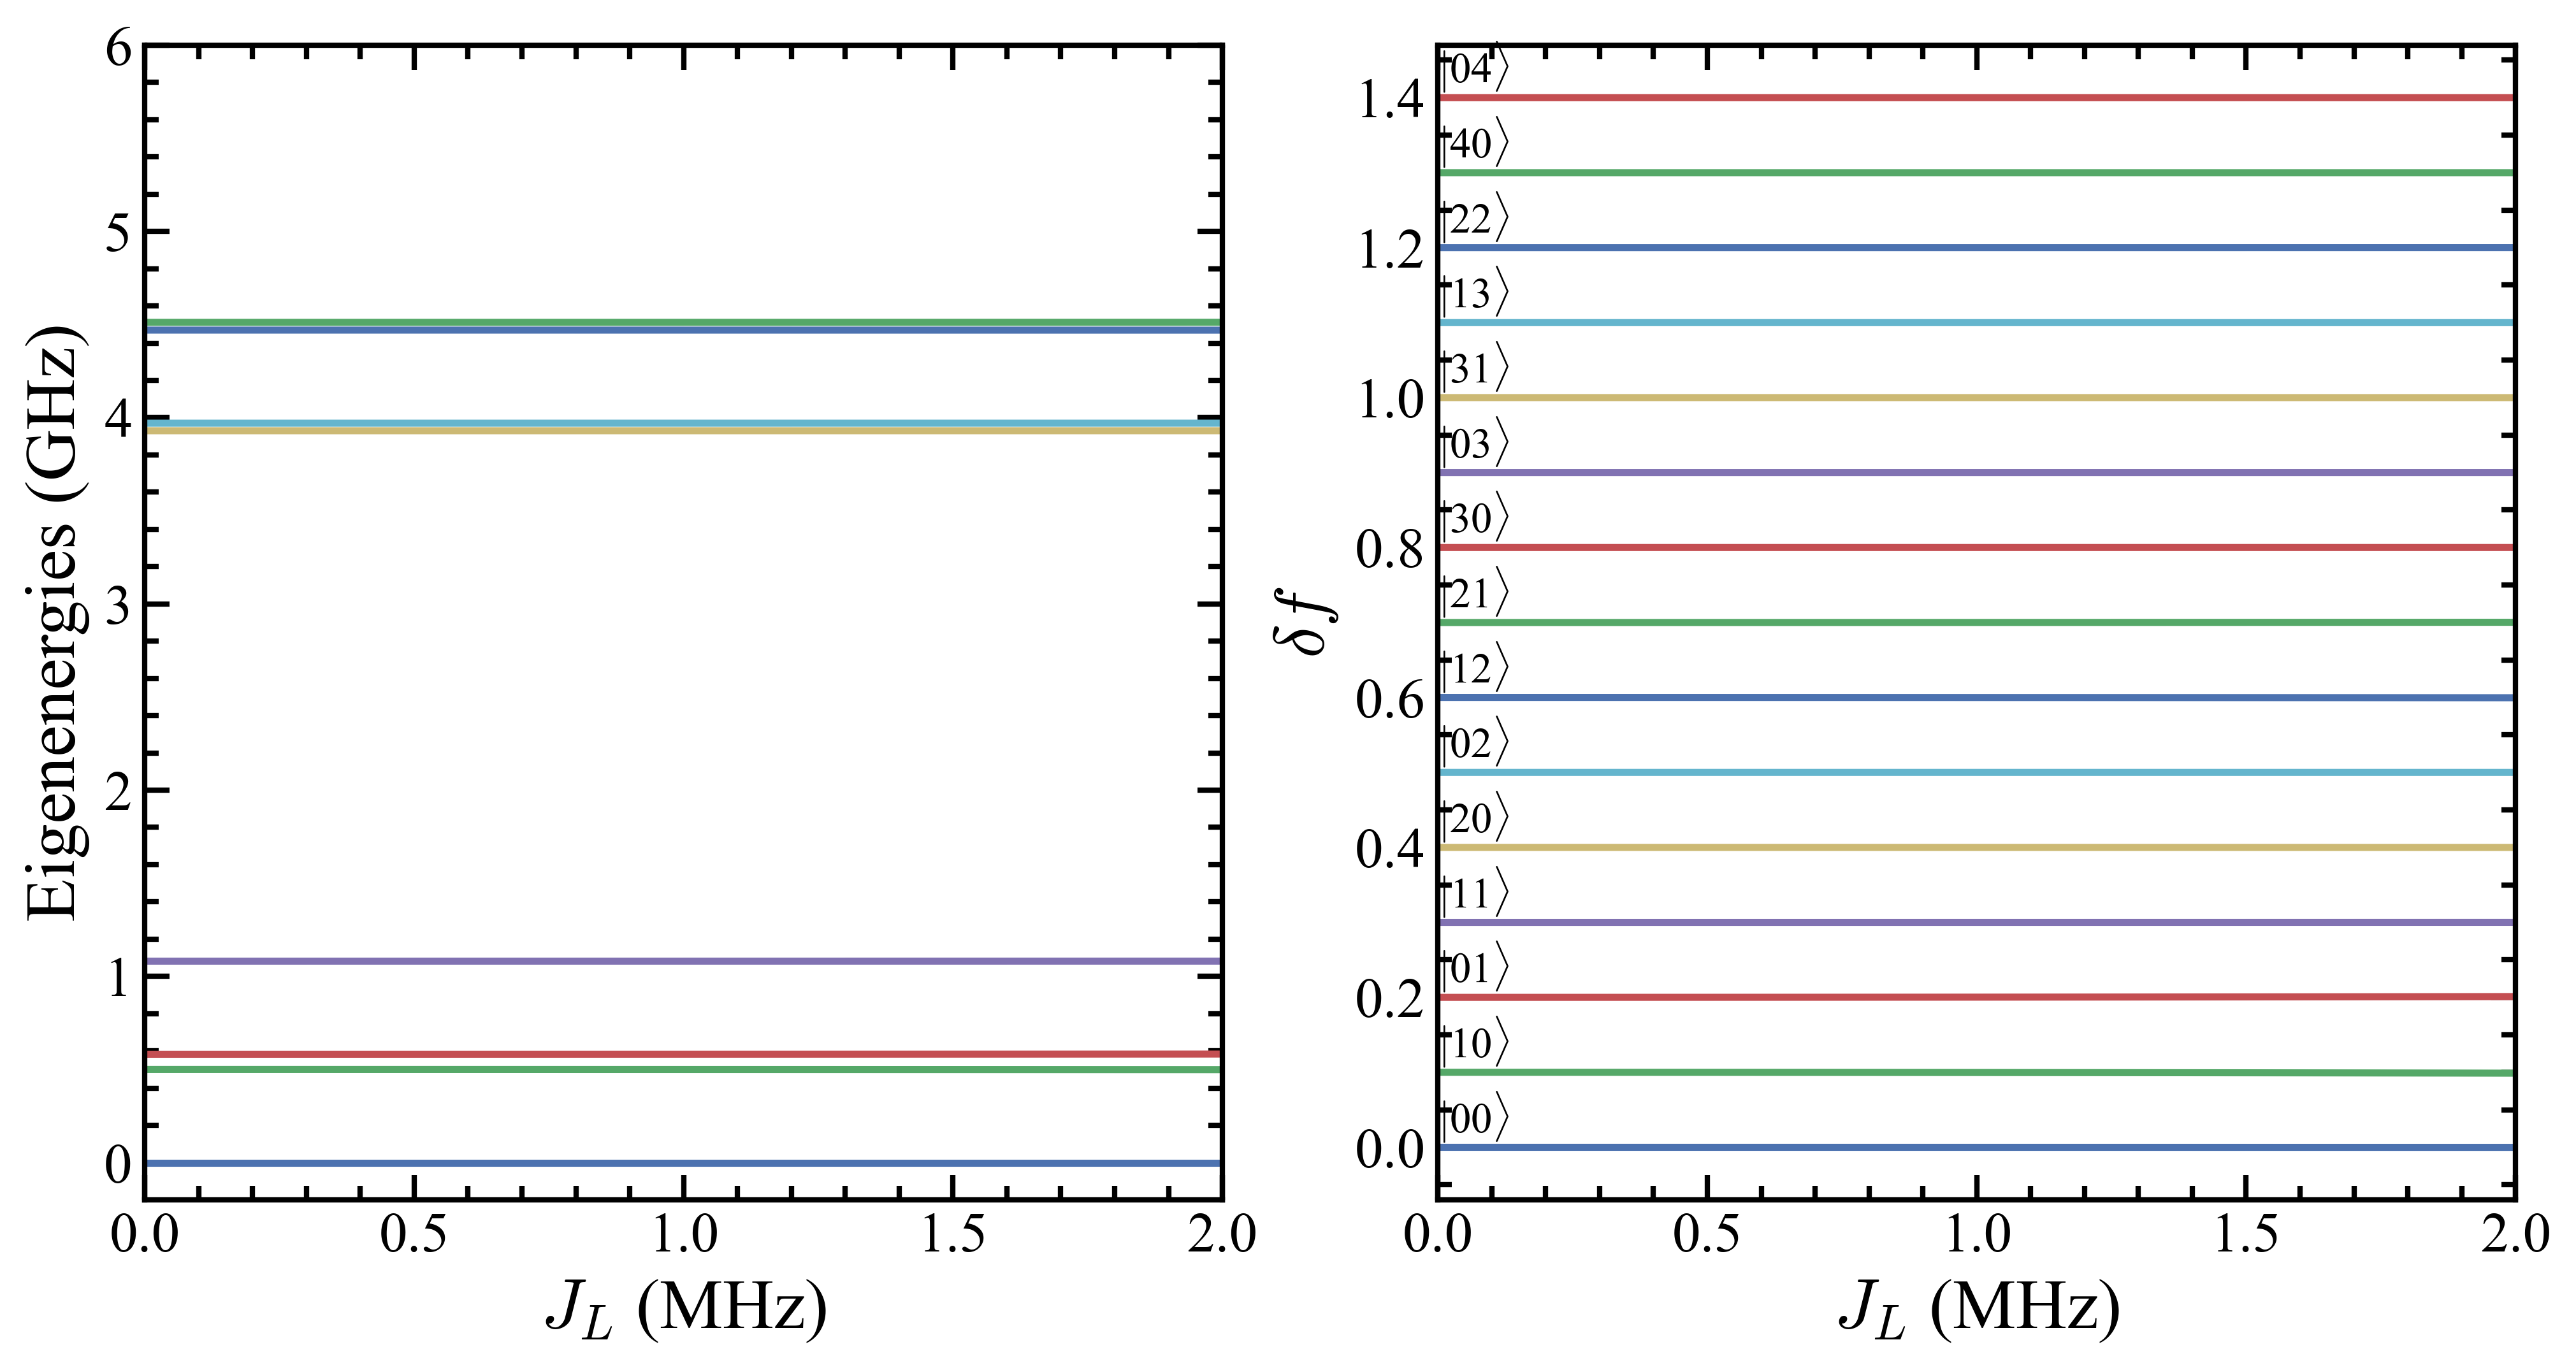

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,6])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

#Transition freqs
for idx in range(0, nlev_show):
    ax1.plot(J_L_array*1e3, energies_coupled_swE_flux[idx, :]-energies_coupled_swE_flux[0, :], linewidth = 2.0)
ax1.set_xlabel('$J_L$ (MHz)')
ax1.set_ylabel('Eigenenergies (GHz)')
ax1.set_xlim([J_L_array[0]*1e3, J_L_array[-1]*1e3])
ax1.set_ylim([-0.2,6])

#State labeling
for idx in range(0, nlev_show):
    ax2.plot(J_L_array*1e3, 0.1 * idx+(energies_coupled_swE_flux[idx, :]-energies_coupled_swE_flux[idx, 0]), linewidth = 2.0)
    label = (r'$|$' + system.level_label(idx, label_format='str') + r'$\rangle$')
    ax2.text(0, 0.02 + 0.1 * idx, label, fontsize=12)
ax2.set_xlabel('$J_L$ (MHz)')
ax2.set_ylabel(r'$\delta f$')
ax2.set_xlim([J_L_array[0]*1e3, J_L_array[-1]*1e3])

<Figure size 2000x1600 with 0 Axes>

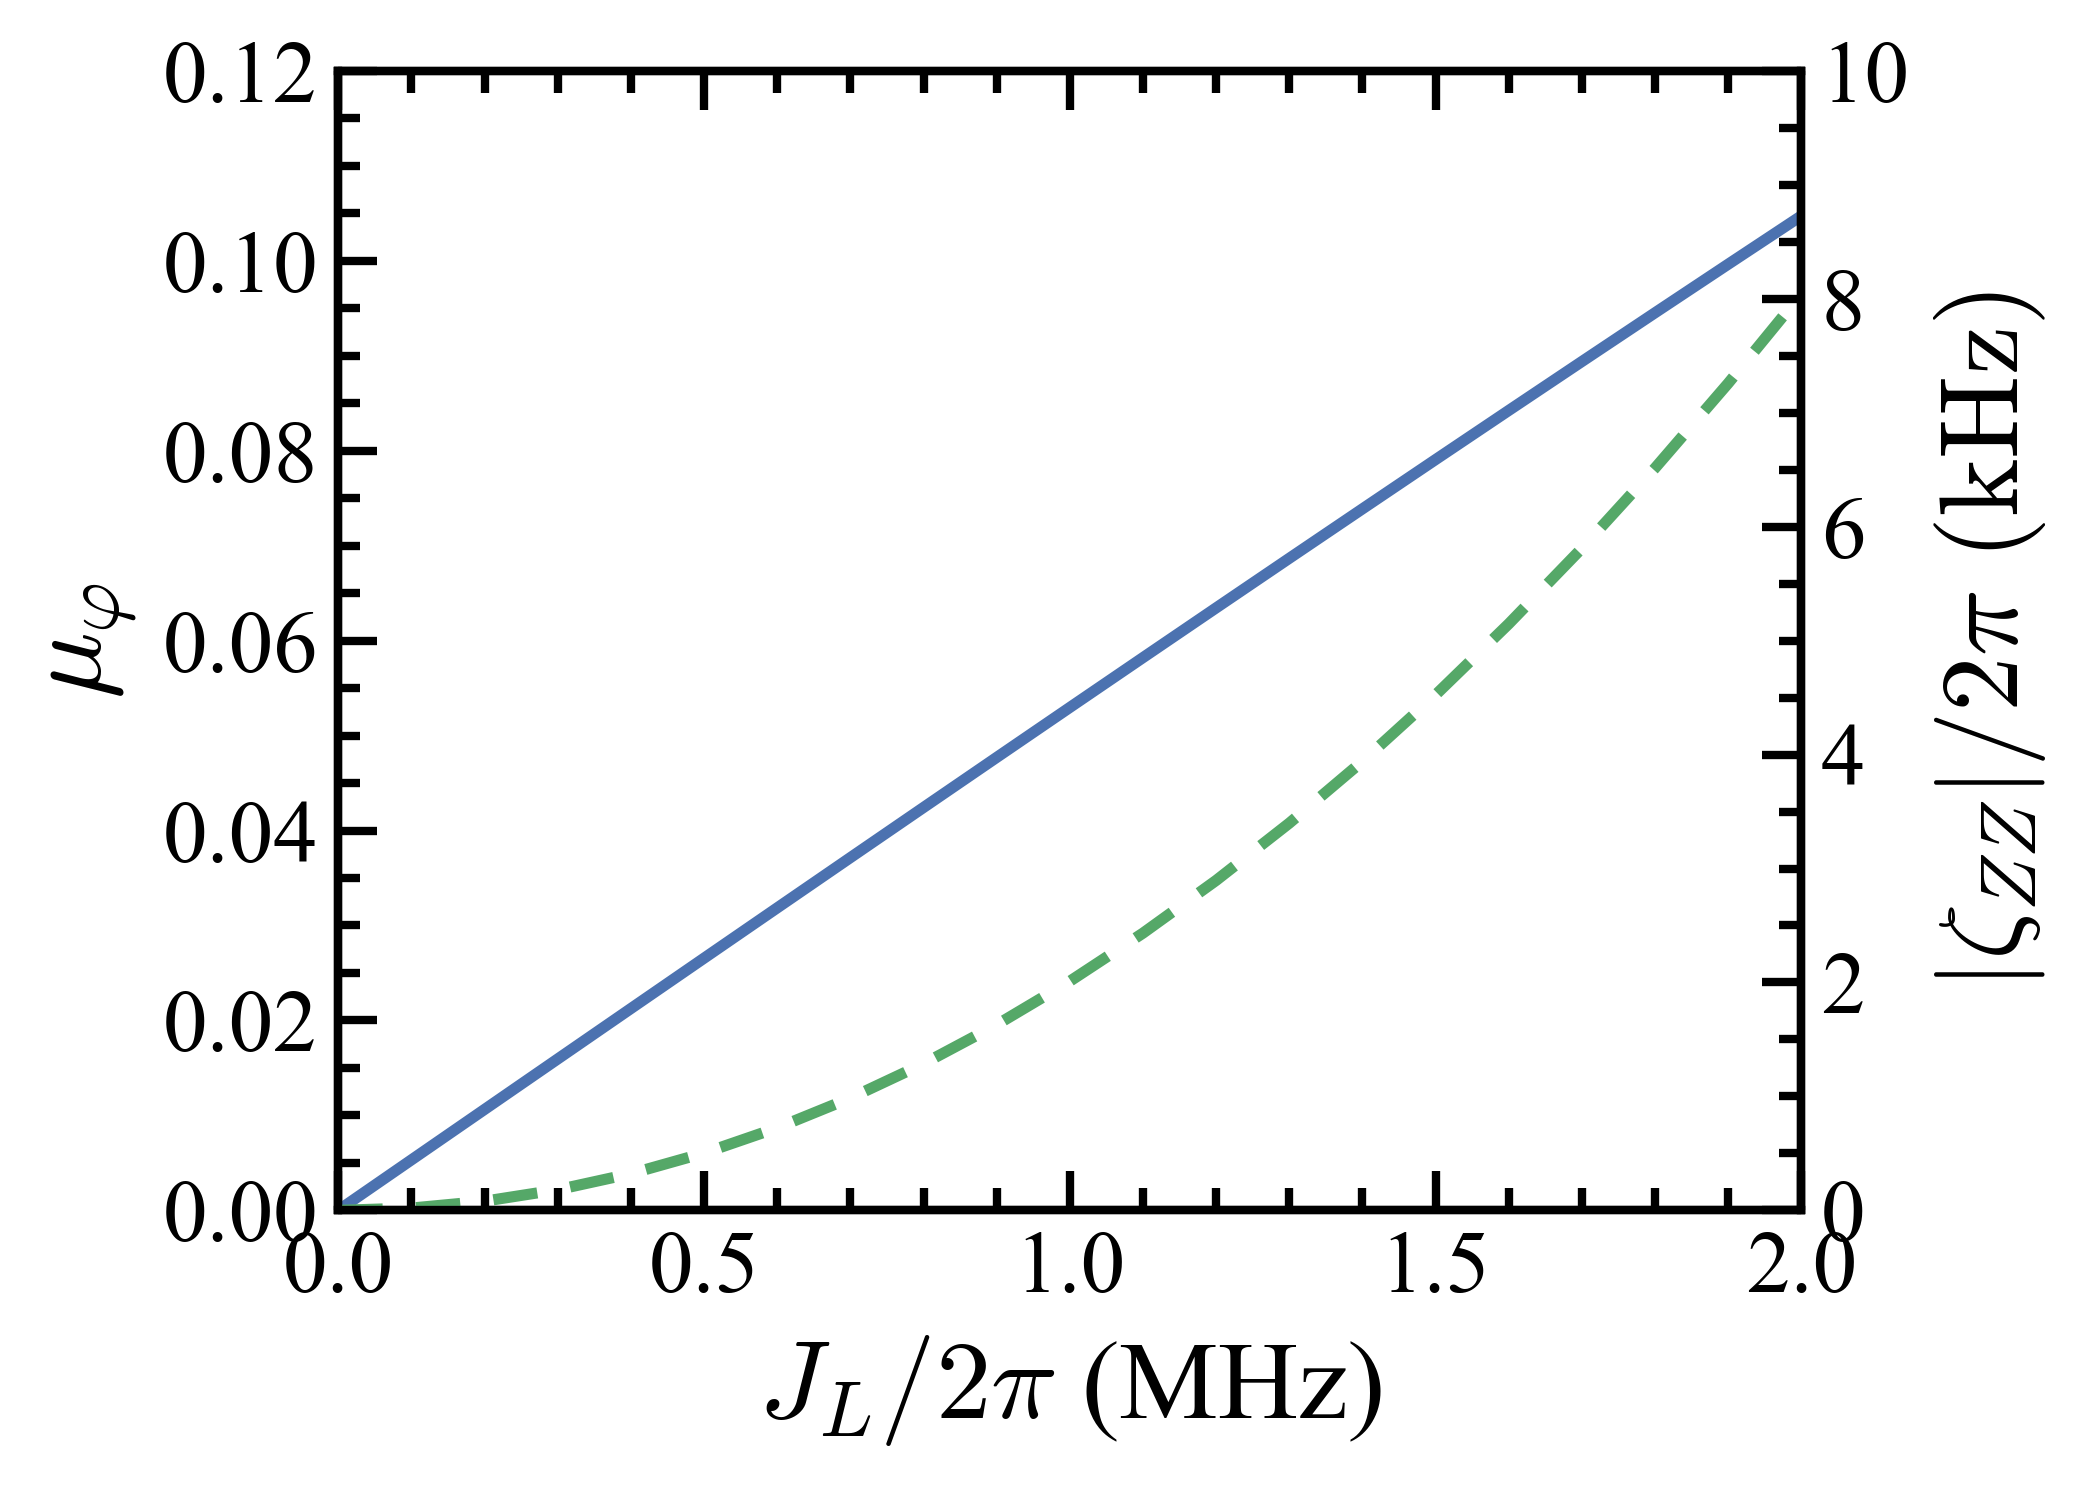

In [25]:
#Calculate ZZ rate:
zeta_ZZ_JL = energies_coupled_swE_flux[system.level_label('11'),:] - energies_coupled_swE_flux[system.level_label('01'),:] \
- (energies_coupled_swE_flux[system.level_label('10'), :] - energies_coupled_swE_flux[system.level_label('00'), :])

plt.figure(figsize = [5,4])
fig,ax = plt.subplots(figsize=[5.5,4])
ax.plot(J_L_array*1e3, m_element_flux2/m_element_flux1, label = r'$\mu_\varphi$')
ax2=ax.twinx()
ax2.plot(J_L_array*1e3, abs(zeta_ZZ_JL)*1e6, label = r'$|\zeta_{ZZ}|$', linestyle = '--', color='C1')
# ax.legend(loc=1)
# ax2.legend(loc=5)
# plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
ax.set_ylabel(r'$\mu_\varphi$')
ax2.set_ylabel(r'$|\zeta_{ZZ}|/2\pi~(\mathrm{kHz})$')
ax.set_xlabel('$J_L/2\pi$ (MHz)')
ax.set_xlim([J_L_array[0]*1e3, J_L_array[-1]*1e3])
ax.set_ylim([0,0.12])
ax2.set_ylim([0,10])
plt.tight_layout()
figname = 'flux_coupling_rate.pdf'
plt.savefig(figpath+figname)

### Sweep parameters for ZZ rate

In [112]:
#Sweep EJ and EL
coupling_type = 'flux'
J_L = 0.001
qubit1.phi_ext = np.pi
qubit2.phi_ext = np.pi
EJ_array = np.linspace(2.5,4.5,201)
EL_array = np.linspace(0.4,1.4,201)
ZZ_rate_flux = np.zeros((len(EJ_array), len(EL_array)))
for EJ_idx, E_J2 in enumerate(EJ_array):
    for EL_idx, E_L2 in enumerate(EL_array): 
        qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
        qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
        system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_L, 'flux'])
        energies_ZZ_flux = system.levels()
        ZZ_rate_flux[EJ_idx, EL_idx] = energies_ZZ_flux[system.level_label('11')] - energies_ZZ_flux[system.level_label('01')] \
- (energies_ZZ_flux[system.level_label('10')] - energies_ZZ_flux[system.level_label('00')])
np.save(figpath+'/CouplingSweep_flux.npy',ZZ_rate_flux)

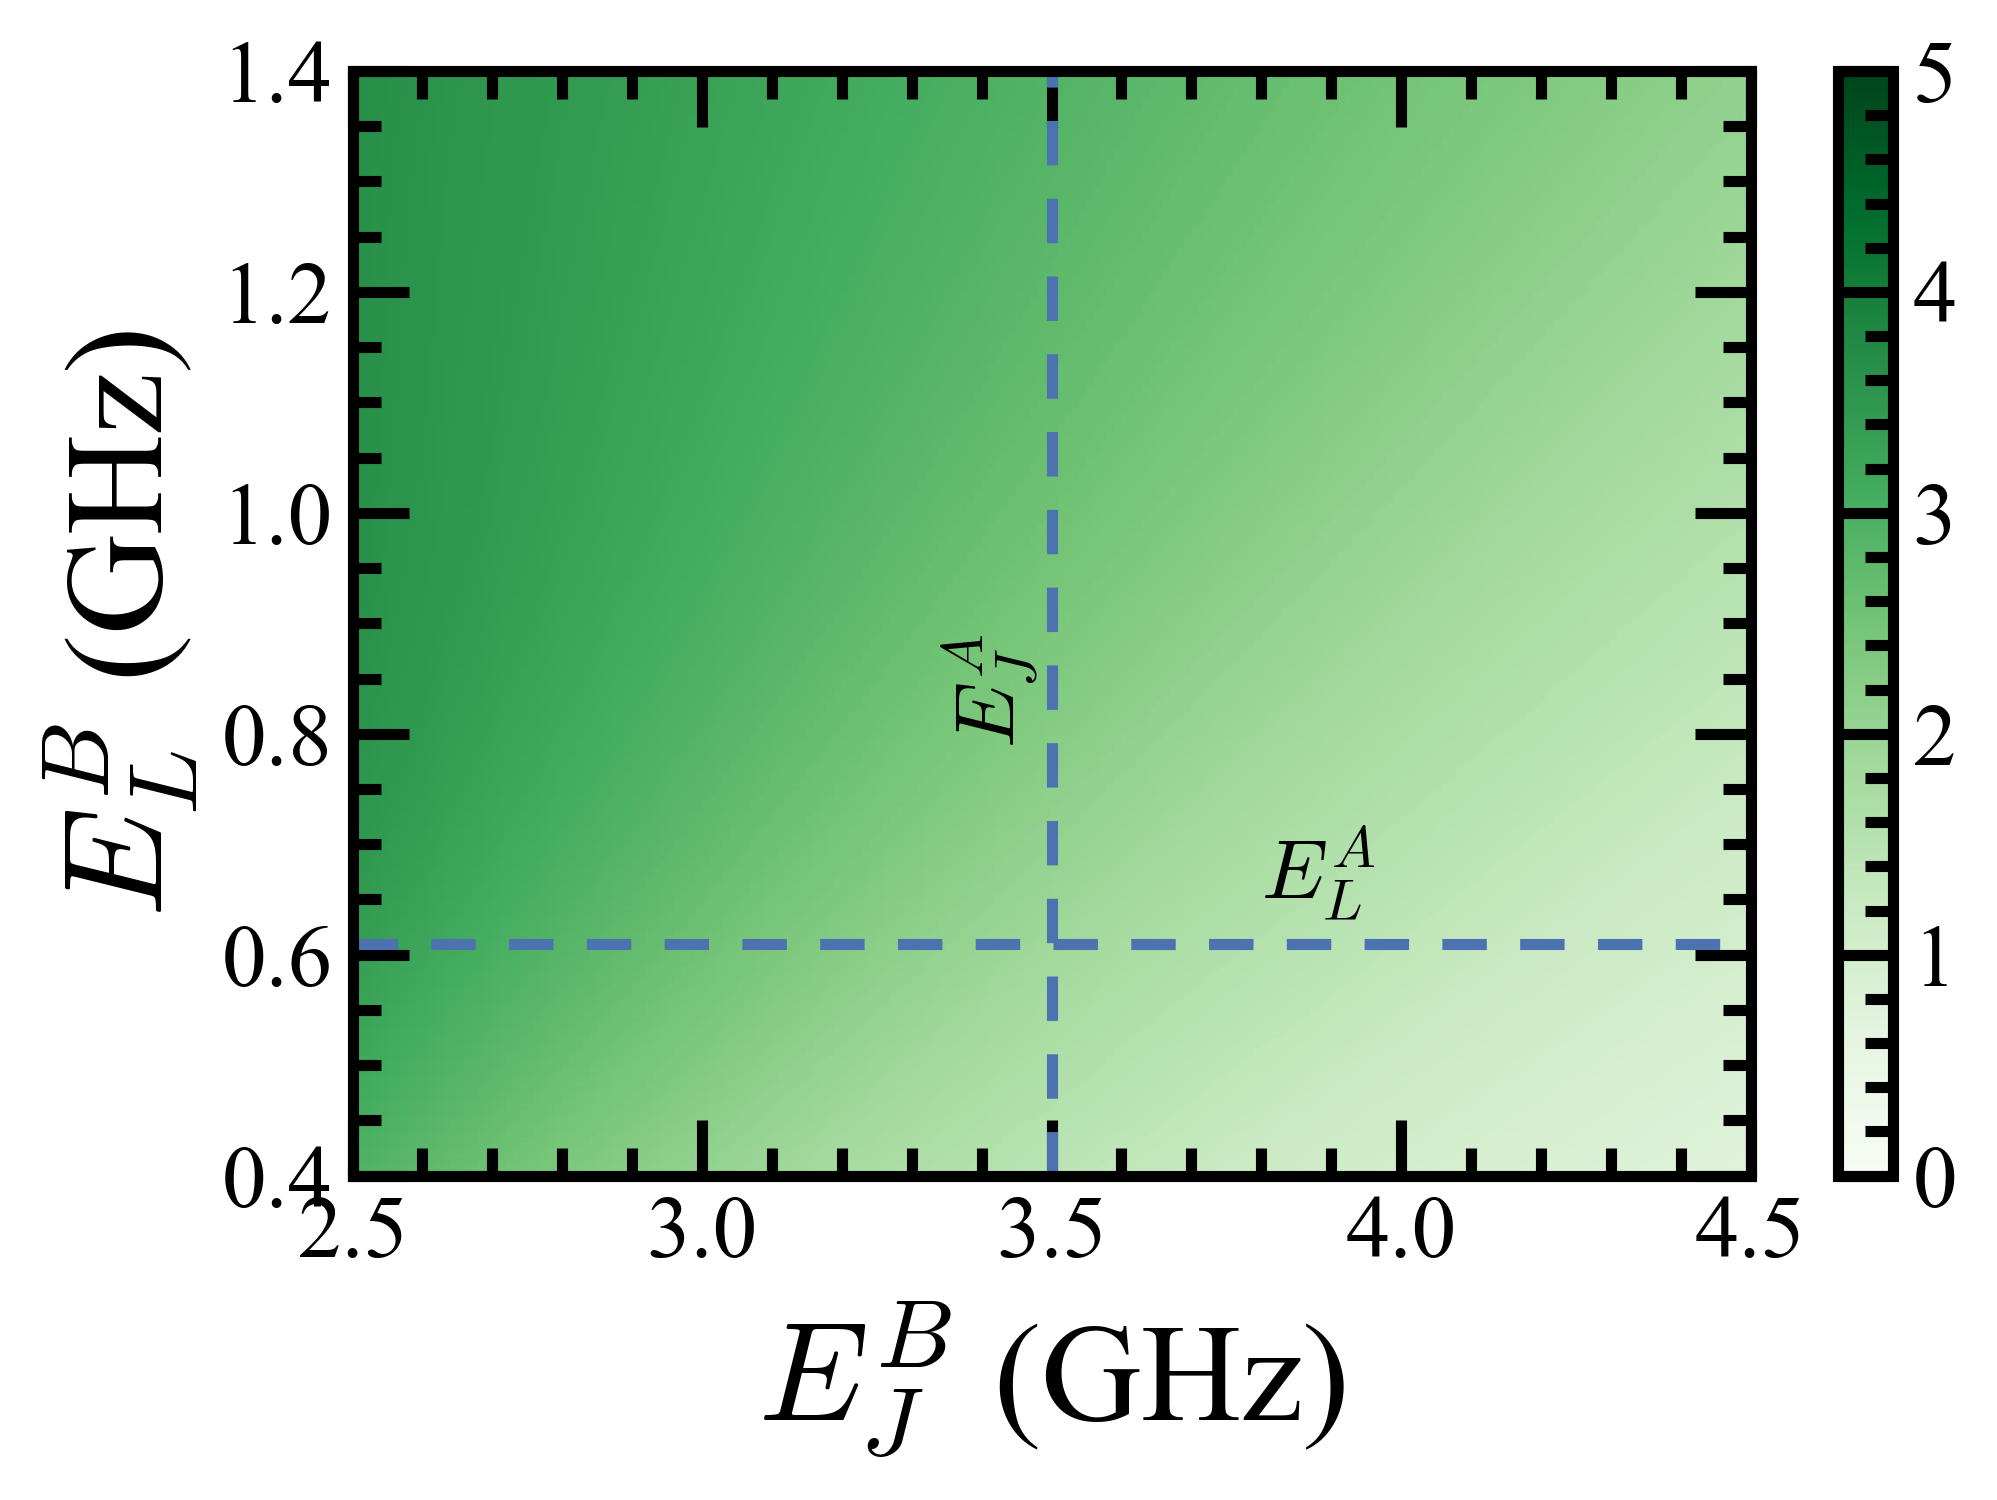

In [143]:
ZZ_rate_flux = np.load(figpath+'/CouplingSweep_flux.npy')
plt.figure(figsize = [5.6,4])
X,Y = np.meshgrid(EJ_array, EL_array)
Z = abs(ZZ_rate_flux).transpose()*1e6
plt.pcolor(X,Y,Z, cmap = 'Greens',vmax = 5, vmin = 0)
plt.colorbar()
plt.axvline(x=E_J1, linewidth = 2.0, linestyle = '--')
plt.axhline(y=E_L1, linewidth = 2.0, linestyle = '--')
plt.xlabel(r'$E_{J}^B$ (GHz)')
plt.ylabel(r'$E_{L}^B$ (GHz)')
plt.tight_layout()
plt.text(E_J1-0.16,E_L1+0.2,r'$E_{J}^A$',rotation = 90)
plt.text(E_J1+0.3,E_L1+0.04,r'$E_{L}^A$')
figname = 'flux_coupling_zz.pdf'
plt.savefig(figpath+figname)

# Charge & Flux dual coupling

In [181]:
# Parameters of the first fluxonium.
E_L1 = 0.9  # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 4  # Josephson energy

# Parameters of the second fluxonium.
E_L2 = 1  # inductive energy
E_C2 = 1.0  # charging energy
E_J2 = 4  # Josephson energy

#Sweep the coupling strength, charge
J_C_array = np.linspace(0, 0.1, 101)
J_L = 0.002
phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
energies_coupled_swE_dual = np.zeros((qubit1.nlev * qubit2.nlev, len(J_C_array)))
mDual_element_flux1 = np.zeros_like(J_C_array)
mDual_element_flux2 = np.zeros_like(J_C_array)
qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)

for idx, J_C in enumerate(J_C_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_L, 'flux'],
                                   [qubit1, qubit2, J_C, 'charge'])
    energies_coupled_swE_dual[:,idx] = system.levels()
    mDual_element_flux1[idx] = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('10')))
    mDual_element_flux2[idx] = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('01')))

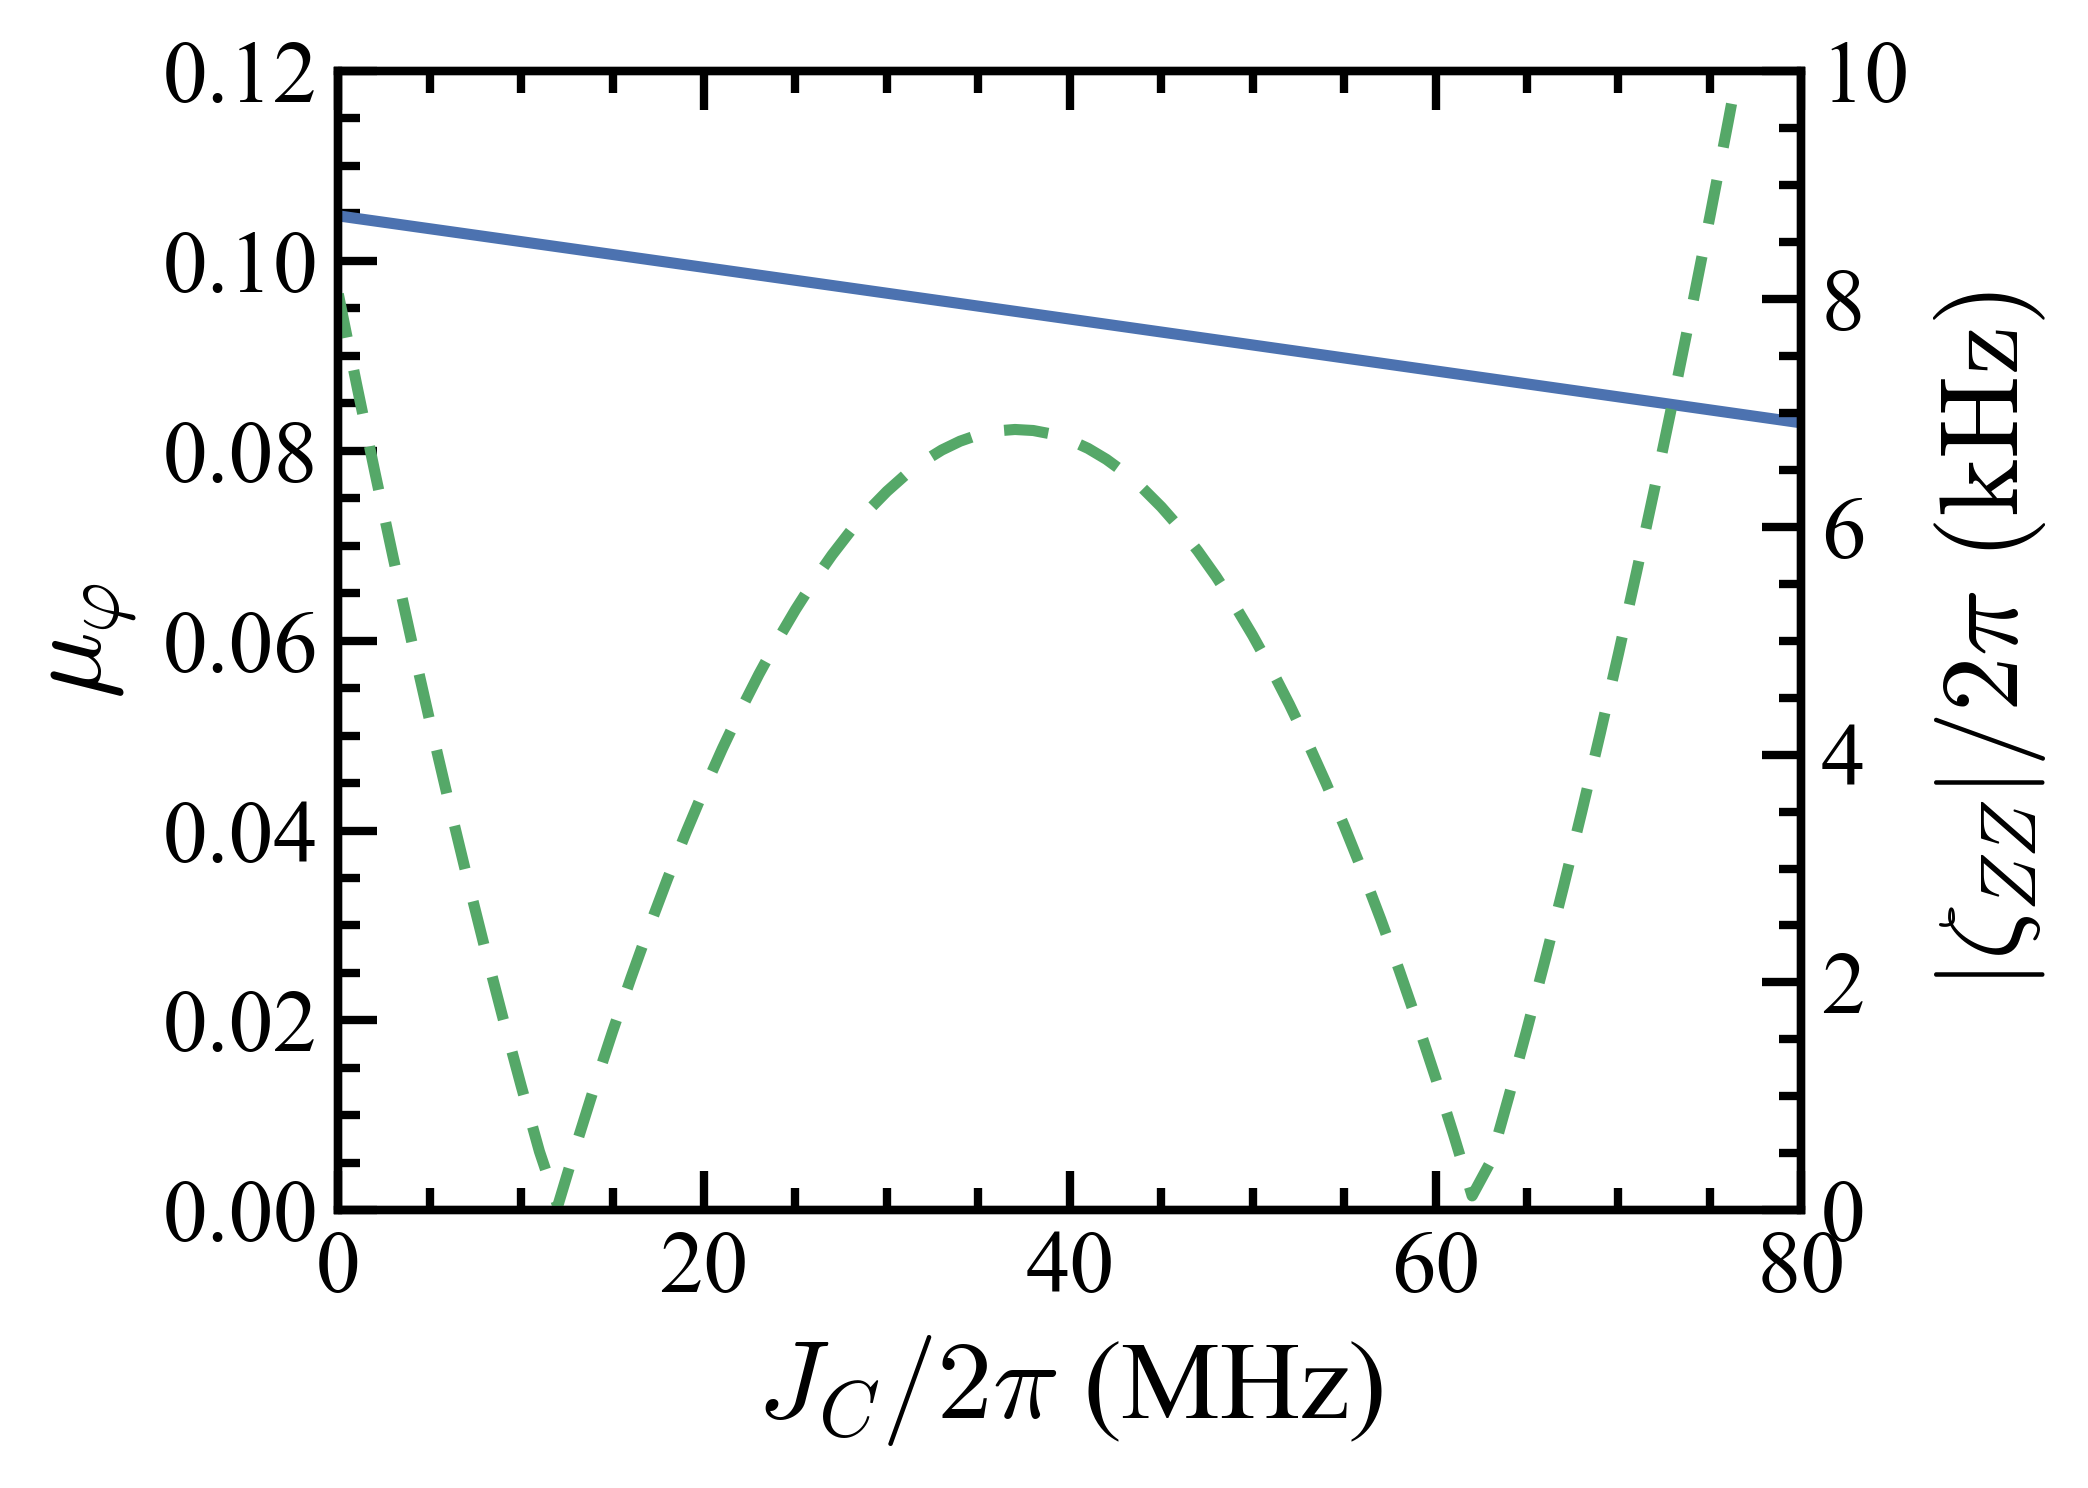

In [184]:
#Calculate ZZ rate:
zeta_ZZ_dual = energies_coupled_swE_dual[system.level_label('11'),:] - energies_coupled_swE_dual[system.level_label('01'),:] \
- (energies_coupled_swE_dual[system.level_label('10'), :] - energies_coupled_swE_dual[system.level_label('00'), :])

fig,ax = plt.subplots(figsize=[5.5,4])
ax.plot(J_C_array*1e3, abs(mDual_element_flux2/mDual_element_flux1), label = r'$\mu_\varphi$')
ax2=ax.twinx()
ax2.plot(J_C_array*1e3, abs(zeta_ZZ_dual)*1e6, label = r'$|\zeta_{ZZ}|$', linestyle = '--', color='C1')
# ax.legend(bbox_to_anchor=(0.32, 1.25))
# ax2.legend(bbox_to_anchor=(0.625, 1.25),loc='upper left')
# plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
ax.set_ylabel(r'$\mu_\varphi$')
ax2.set_ylabel(r'$|\zeta_{ZZ}|/2\pi~(\mathrm{kHz})$')
# ax2.set_yscale('log')
ax.set_xlabel('$J_C/2\pi$ (MHz)')
ax.set_xlim([J_C_array[0]*1e3, 80])
ax.set_ylim([0,0.12])
ax2.set_ylim([0,10])
plt.tight_layout()
figname = 'dual_coupling_rate.pdf'
plt.savefig(figpath+figname)
# print (J_C_array[np.argmin (abs(zeta_ZZ_dual[:200]))])

In [28]:
E_L1 = 0.9  # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 4  # Josephson energy

# Parameters of the second fluxonium.
E_L2 = 1.0  # inductive energy
E_C2 = 1.0  # charging energy
E_J2 = 4  # Josephson energy

phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext


#Find J_C that minimizes ZZ
J_L = 0.002
phi_ext = np.pi

def dual_coupl_ZZ (x):
    J_C = x[0]
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_L, 'flux'],
                                   [qubit1, qubit2, J_C, 'charge'])
    energies = system.levels()
    zeta_ZZ = energies[system.level_label('11')]+energies[system.level_label('00')] - energies[system.level_label('10')] - energies[system.level_label('01')]
    return abs(zeta_ZZ)

x0 = [0.0136]
xopt = minimize(dual_coupl_ZZ, x0, method ='Powell', tol = 1e-8)
print (xopt.x)
print (dual_coupl_ZZ(xopt.x))

   direc: array([[1.12829594e-11]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 158
     nit: 3
  status: 0
 success: True
       x: array([0.01192952])
0.0


## Sweeping qubit parameters to check for fluctuations

In [251]:
E_J2 = 1
EL_array = np.linspace(0.5,1.6,101)
ZZ_rate_sweep = np.zeros(len(EL_array))
J_L = 0.002
J_C = 0.0115

for EL_idx, E_L2 in enumerate(EL_array): 
    qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
    qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                [qubit1, qubit2, J_L, 'flux'],
                                [qubit1, qubit2, J_C, 'charge'])
    energies_ZZ_sweep = system.levels()
    ZZ_rate_sweep[EL_idx] = energies_ZZ_sweep[system.level_label('11')] - energies_ZZ_sweep[system.level_label('01')] \
- (energies_ZZ_sweep[system.level_label('10')] - energies_ZZ_sweep[system.level_label('00')])
# np.save(figpath+'/CouplingSweep_dual.npy',ZZ_rate_sweep)

In [252]:
plt.plot(EL_array, abs(ZZ_rate_sweep)*1e6)
plt.ylim([0,0.4])

(0.0, 0.4)

In [29]:
E_L = 1  # inductive energy
E_J = 4
dE_L = E_L*0.1
dE_J = E_J*0.1
#new EJ
EJ_array = np.linspace(E_J-dE_J, E_J+dE_J, 101)
EL_array = np.linspace(E_L-dE_L, E_L+dE_L, 121)
ZZ_rate_sweep = np.zeros((len(EJ_array), len(EL_array)))
J_L = 0.002
J_C = 0.011929
for EJ_idx, E_J2 in enumerate(EJ_array):
    for EL_idx, E_L2 in enumerate(EL_array): 
        qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
        system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_L, 'flux'],
                                    [qubit1, qubit2, J_C, 'charge'])
        energies_ZZ_sweep = system.levels()
        ZZ_rate_sweep[EJ_idx, EL_idx] = energies_ZZ_sweep[system.level_label('11')] - energies_ZZ_sweep[system.level_label('01')] \
- (energies_ZZ_sweep[system.level_label('10')] - energies_ZZ_sweep[system.level_label('00')])
np.save(figpath+'/CouplingSweep_dual.npy',ZZ_rate_sweep)

In [30]:
ZZ_rate_sweep = np.load(figpath+'/CouplingSweep_dual.npy')
EJ_array = np.linspace(E_J-dE_J, E_J+dE_J, 101)
EL_array = np.linspace(E_L-dE_L, E_L+dE_L, 121)

plt.figure(figsize = [5.6,4])
X,Y = np.meshgrid((EJ_array-E_J)/E_J*100, (EL_array-E_L)/E_L*100)
Z = (abs(ZZ_rate_sweep)*1e6).transpose()
plt.pcolor(X, Y, Z, cmap = 'Greens', vmax = 0.5, vmin = 0)
clb = plt.colorbar()
plt.xlabel(r'$\delta E_J^B/E_J^B (\%)$')
plt.ylabel(r'$\delta E_L^B/E_L^B (\%)$')
plt.tight_layout()
# plt.axvline(0)
# plt.axhline(0)
figname = 'dual_zz_rate.pdf'
plt.savefig(figpath+figname)

## Find correct J_eff

In [158]:
#Define coupled two-level system Hamiltonian
II = tensor(qeye(2),qeye(2))
IZ = tensor(qeye(2), sigmaz())
ZI = tensor(sigmaz(), qeye(2))
XI = tensor(sigmax(), qeye(2))
IX = tensor(qeye(2), sigmax())
YI = tensor(sigmay(), qeye(2))
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())

def two_q_hamiltonian(w1, w2, J):
    return -0.5*w1*ZI - 0.5*w2*IZ + J*XX

In [163]:
#Qubit frequency
w1 = 0.499
w2 = 0.581

J_array  = np.linspace(0,0.01,21)
freq_shift = np.zeros_like(J_array)
m_element_1 = np.zeros_like(J_array)
m_element_2 = np.zeros_like(J_array)
overlap = np.zeros_like(J_array)
for idx, J in enumerate(J_array):
    H0 = two_q_hamiltonian(w1, w2, J)
    eig_energies, eig_states = H0.eigenstates() #System
    m_element_1 [idx] = abs(XI.matrix_element(eig_states[1], eig_states[0]))
    m_element_2 [idx] = abs(XI.matrix_element(eig_states[2], eig_states[0]))

Text(0.5, 0, '')

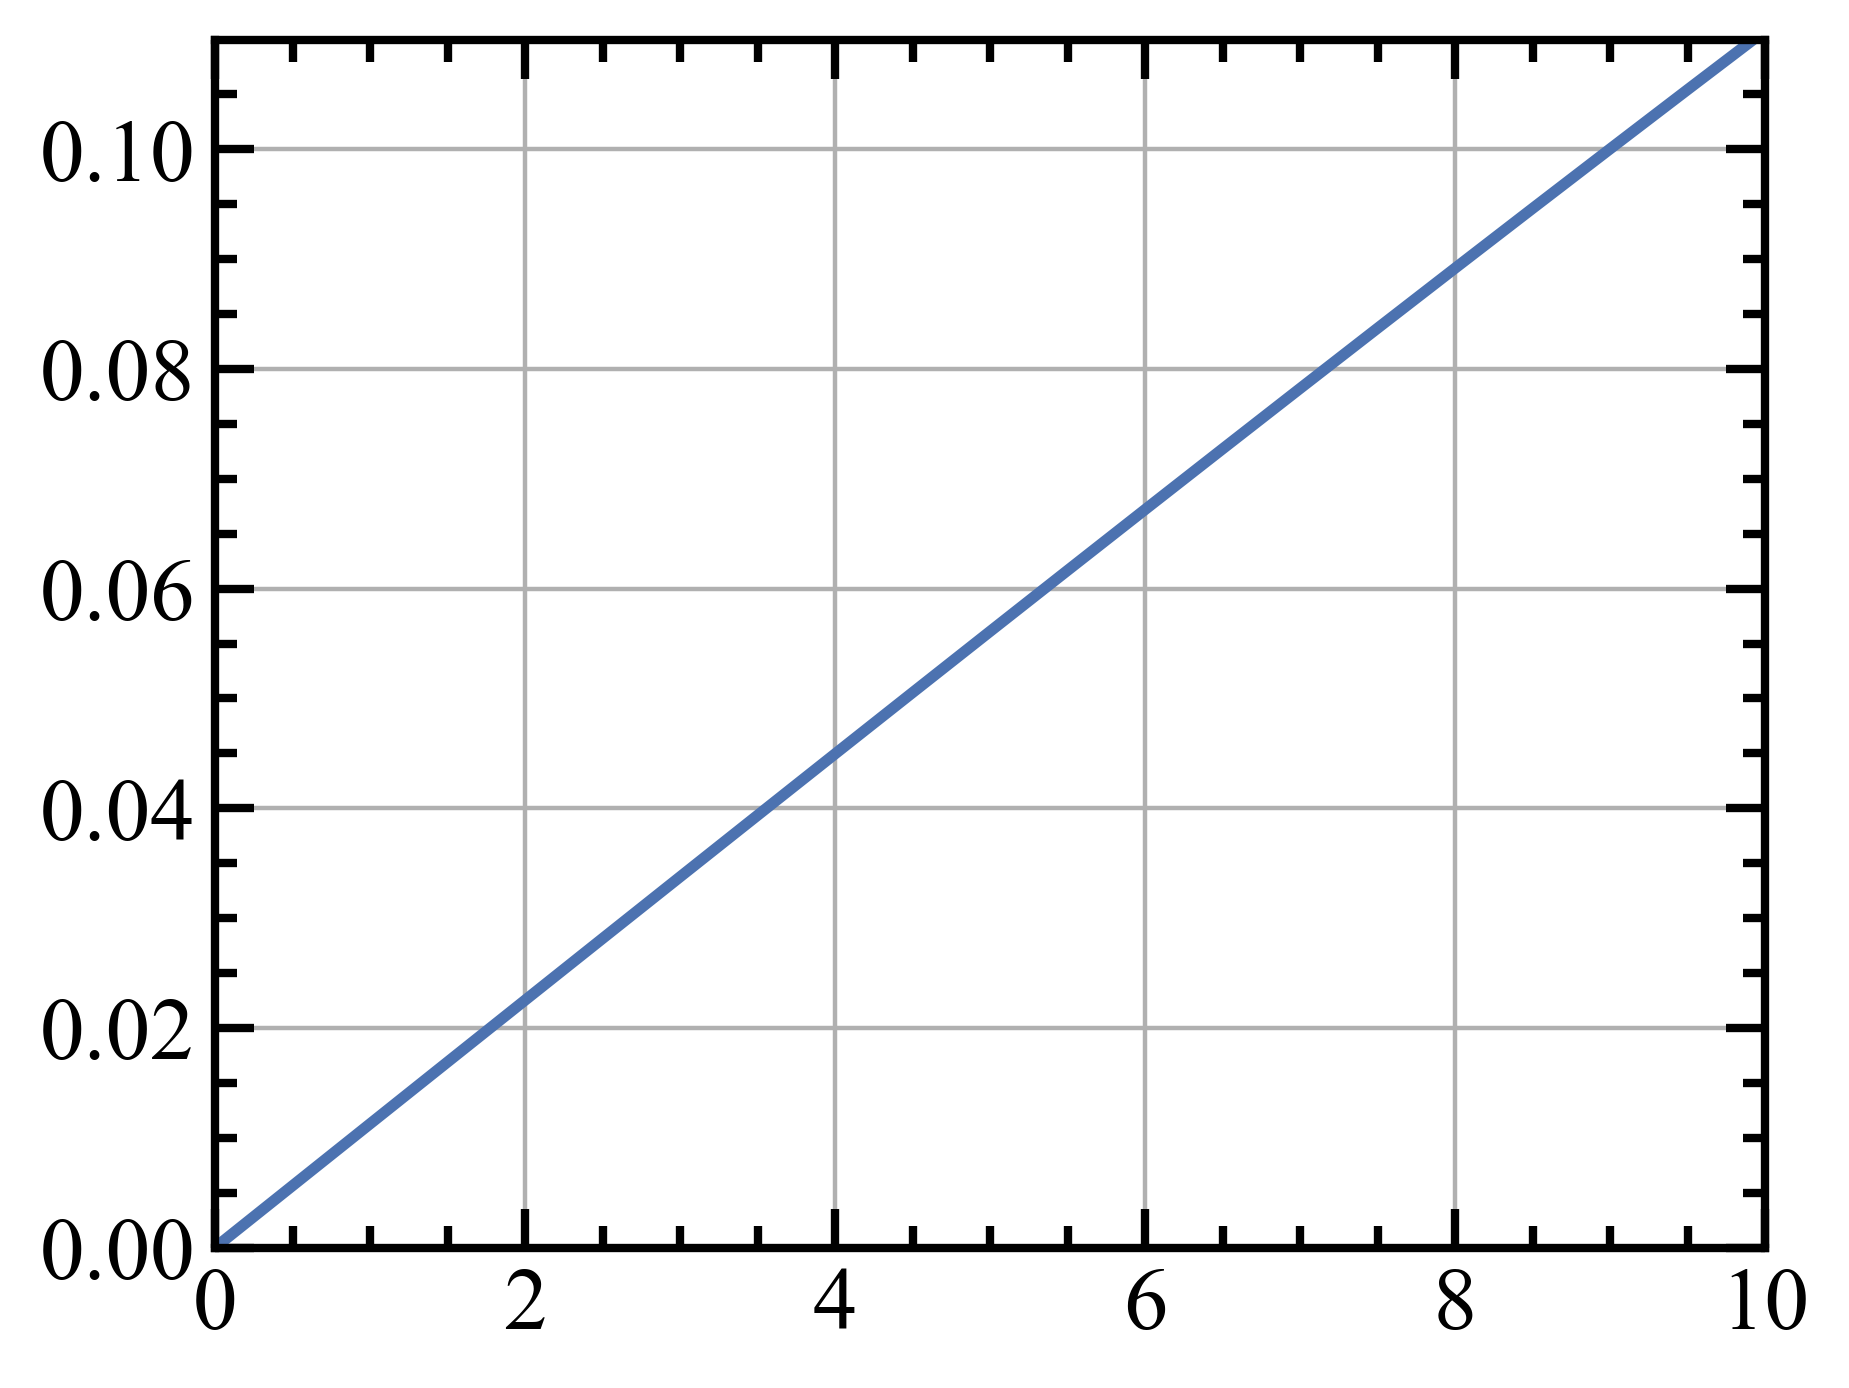

In [166]:
m = m_element_2/m_element_1
# print (m[-1])

plt.figure(figsize = [5,4])
plt.plot(J_array*1e3, m)
plt.xlim([J_array[0]*1e3, J_array[-1]*1e3])
plt.ylim([0,0.11])
plt.grid()
plt.xlabel('')

In [98]:
# Sweep J_L, find J_C that cancell ZZ, find normalized cross matrix element

E_L1 = 0.9  # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 4  # Josephson energy

# Parameters of the second fluxonium.
E_L2 = 1  # inductive energy
E_C2 = 1.0  # charging energy
E_J2 = 4  # Josephson energy

phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
    

#Find J_C that minimizes ZZ
J_L_array = np.linspace(0,0.005,21)
mDual = np.zeros_like(J_L_array)
J_C_array = np.zeros_like(J_L_array)
phi_ext = np.pi

# for idx, J_L in enumerate(J_L_array):
#     def dual_coupl_ZZ (x):
#         J_C = x[0]
#         system = coupobj.CoupledObjects(qubit1, qubit2,
#                                         [qubit1, qubit2, J_L, 'flux'],
#                                        [qubit1, qubit2, J_C, 'charge'])
#         energies = system.levels()
#         zeta_ZZ = energies[system.level_label('11')]+energies[system.level_label('00')] - energies[system.level_label('10')] - energies[system.level_label('01')]
#         return abs(zeta_ZZ)*1e6

#     x0 = [0]
#     xopt = minimize(dual_coupl_ZZ, x0, method ='Powell', tol = 1e-8)
#     J_C_opt = xopt.x[0]
#     J_C_array[idx] = J_C_opt

In [99]:
mFlux = np.zeros_like(J_L_array)
for idx, J_L in enumerate(J_L_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                        [qubit1, qubit2, J_L, 'flux'],
                                       [qubit1, qubit2, J_C_array[idx], 'charge'])
    mDual_element_opt1 = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('10')))
    mDual_element_opt2 = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('01')))
    mDual[idx] = mDual_element_opt2 / mDual_element_opt1
    
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                        [qubit1, qubit2, J_L, 'flux'])
    mDual_element_opt1 = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('10')))
    mDual_element_opt2 = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('01')))
    mFlux[idx] = mDual_element_opt2 / mDual_element_opt1

In [100]:
plt.figure(figsize = [5,4])
phi1 = 2.214944375431104
phi2 = 2.1310128828105026
n1 = 0.5385850708009532
n2 = 0.5481034040581505

plt.plot(J_array*1e3, m, label = r'$J_\mathrm{eff}\hat{X}_A\hat{X}_B$')
plt.plot(J_array*1e3, m, label = r'$J_\mathrm{eff}\hat{X}_A\hat{X}_B$')
plt.plot(J_L_array*1e3, mDual, label = r'$J_L\hat{\varphi}_A\hat{\varphi}_B$')
# plt.plot(J_L_array*1e3*(phi1*phi2), mFlux)
# plt.plot(J_L_array*1e3, mDual, label = r'$J_L/(\varphi_{01}^A \varphi_{01}^B$')
plt.plot(J_L_array*1e3*(phi1*phi2), mDual, linestyle = '--', linewidth = 1.5, color = 'C4', label = r'$\frac{J_L}{\varphi_{01}^A \varphi_{01}^B}\hat{\varphi}_A\hat{\varphi}_B$')
# def line_fit(x,slope):
#     return slope*x
# opt, cov = curve_fit(line_fit, xdata = mDual, ydata = m)
# print (opt)


# plt.plot(J_array*1e3, m*phi1*phi2-m*n1*n2,'-.')
# plt.xlim([J_array[0]*1e3, J_array[-1]*1e3])
plt.ylim([0,0.2])
plt.xlim([0,10])
plt.xlabel(r'$\{J_L,J_\mathrm{eff}\}/2\pi~(\mathrm{MHz})$')
plt.ylabel(r'$\mu_{\{X,\varphi\}}$')
plt.tight_layout()
plt.legend()

figname = 'J_eff_mapping.pdf'
plt.savefig(figpath+figname)

# plt.plot(J_L_array*1e3, J_C_array*1e3)
# plt.ylim([0,1])

## Sweep frequency

In [80]:
E_L_array = np.linspace(0.55, 1.6,21)
print (E_L_array)

[0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6   0.605
 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66  0.665
 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715 0.72  0.725
 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775 0.78  0.785
 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83  0.835 0.84  0.845
 0.85  0.855 0.86  0.865 0.87  0.875 0.88  0.885 0.89  0.895 0.9   0.905
 0.91  0.915 0.92  0.925 0.93  0.935 0.94  0.945 0.95  0.955 0.96  0.965
 0.97  0.975 0.98  0.985 0.99  0.995 1.    1.005 1.01  1.015 1.02  1.025
 1.03  1.035 1.04  1.045 1.05  1.055 1.06  1.065 1.07  1.075 1.08  1.085
 1.09  1.095 1.1   1.105 1.11  1.115 1.12  1.125 1.13  1.135 1.14  1.145
 1.15  1.155 1.16  1.165 1.17  1.175 1.18  1.185 1.19  1.195 1.2   1.205
 1.21  1.215 1.22  1.225 1.23  1.235 1.24  1.245 1.25  1.255 1.26  1.265
 1.27  1.275 1.28  1.285 1.29  1.295 1.3   1.305 1.31  1.315 1.32  1.325
 1.33  1.335 1.34  1.345 1.35  1.355 1.36  1.365 1.

In [147]:
# Sweep J_L, find J_C that cancell ZZ, find normalized cross matrix element

E_L1 = 0.5  # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 4  # Josephson energy

E_C2 = 1.0  # charging energy
E_J2 = 4  # Josephson energy

E_L_array = np.linspace(0.55, 1.6,211)
mDual = np.zeros_like(E_L_array)
J_C_array = np.zeros_like(E_L_array)

J_L = 0.002
phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = 7, nlev_lc = nlev_lc)
print (qubit1.phi_ij(0,1))
# for idx, E_L2 in enumerate (E_L_array):
#     qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = 7, nlev_lc = nlev_lc)
#     def dual_coupl_ZZ (x):
#         J_C = x[0]
#         system = coupobj.CoupledObjects(qubit1, qubit2,
#                                         [qubit1, qubit2, J_L, 'flux'],
#                                        [qubit1, qubit2, J_C, 'charge'])
#         energies = system.levels()
#         zeta_ZZ = energies[system.level_label('11')]+energies[system.level_label('00')] - energies[system.level_label('10')] - energies[system.level_label('01')]
#         return abs(zeta_ZZ)*1e6

#     x0 = [0.013]
#     xopt = minimize(dual_coupl_ZZ, x0, method ='Nelder-Mead', tol = 1e-8)
#     J_C_opt = xopt.x[0]
#     J_C_array[idx] = J_C_opt

(2.585139799911089+0j)


In [139]:
plt.plot(E_L_array, J_C_array)
# np.save(figpath+'/optimal_JC.npy',J_C_array)

In [148]:
freq = np.zeros_like(E_L_array)
phi2 = np.zeros_like(E_L_array)
for idx, E_L2 in enumerate(E_L_array):
    qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
    phi2[idx] = abs(qubit2.phi_ij(0,1))
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                        [qubit1, qubit2, J_L, 'flux'],
                                       [qubit1, qubit2, 0.0115, 'charge'])
    freq[idx] = system.freq('00','01') - system.freq('00','10')
    mDual_element_opt1 = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('10')))
    mDual_element_opt2 = abs(system.phi(0).matrix_element(system.eigvec('00'), system.eigvec('01')))
    mDual[idx] = mDual_element_opt2 / mDual_element_opt1

In [149]:
w1 = 0.2372175154450057
detuning_array = np.linspace(freq[0], freq[-1],211)
m_element_1 = np.zeros_like(detuning_array )
m_element_2 = np.zeros_like(detuning_array )
phi1 = 2.585139799911089
for idx, detuning in enumerate(detuning_array):
    w2 = w1 + detuning
    J = 0.002*phi1*phi2[idx]
    H0 = two_q_hamiltonian(w1, w2, J)
    eig_energies, eig_states = H0.eigenstates() #System
    m_element_1 [idx] = abs(XI.matrix_element(eig_states[1], eig_states[0]))
    m_element_2 [idx] = abs(XI.matrix_element(eig_states[2], eig_states[0]))
m = m_element_2 / m_element_1
print (0.002*phi1*phi2[-1])

0.008871992236941574


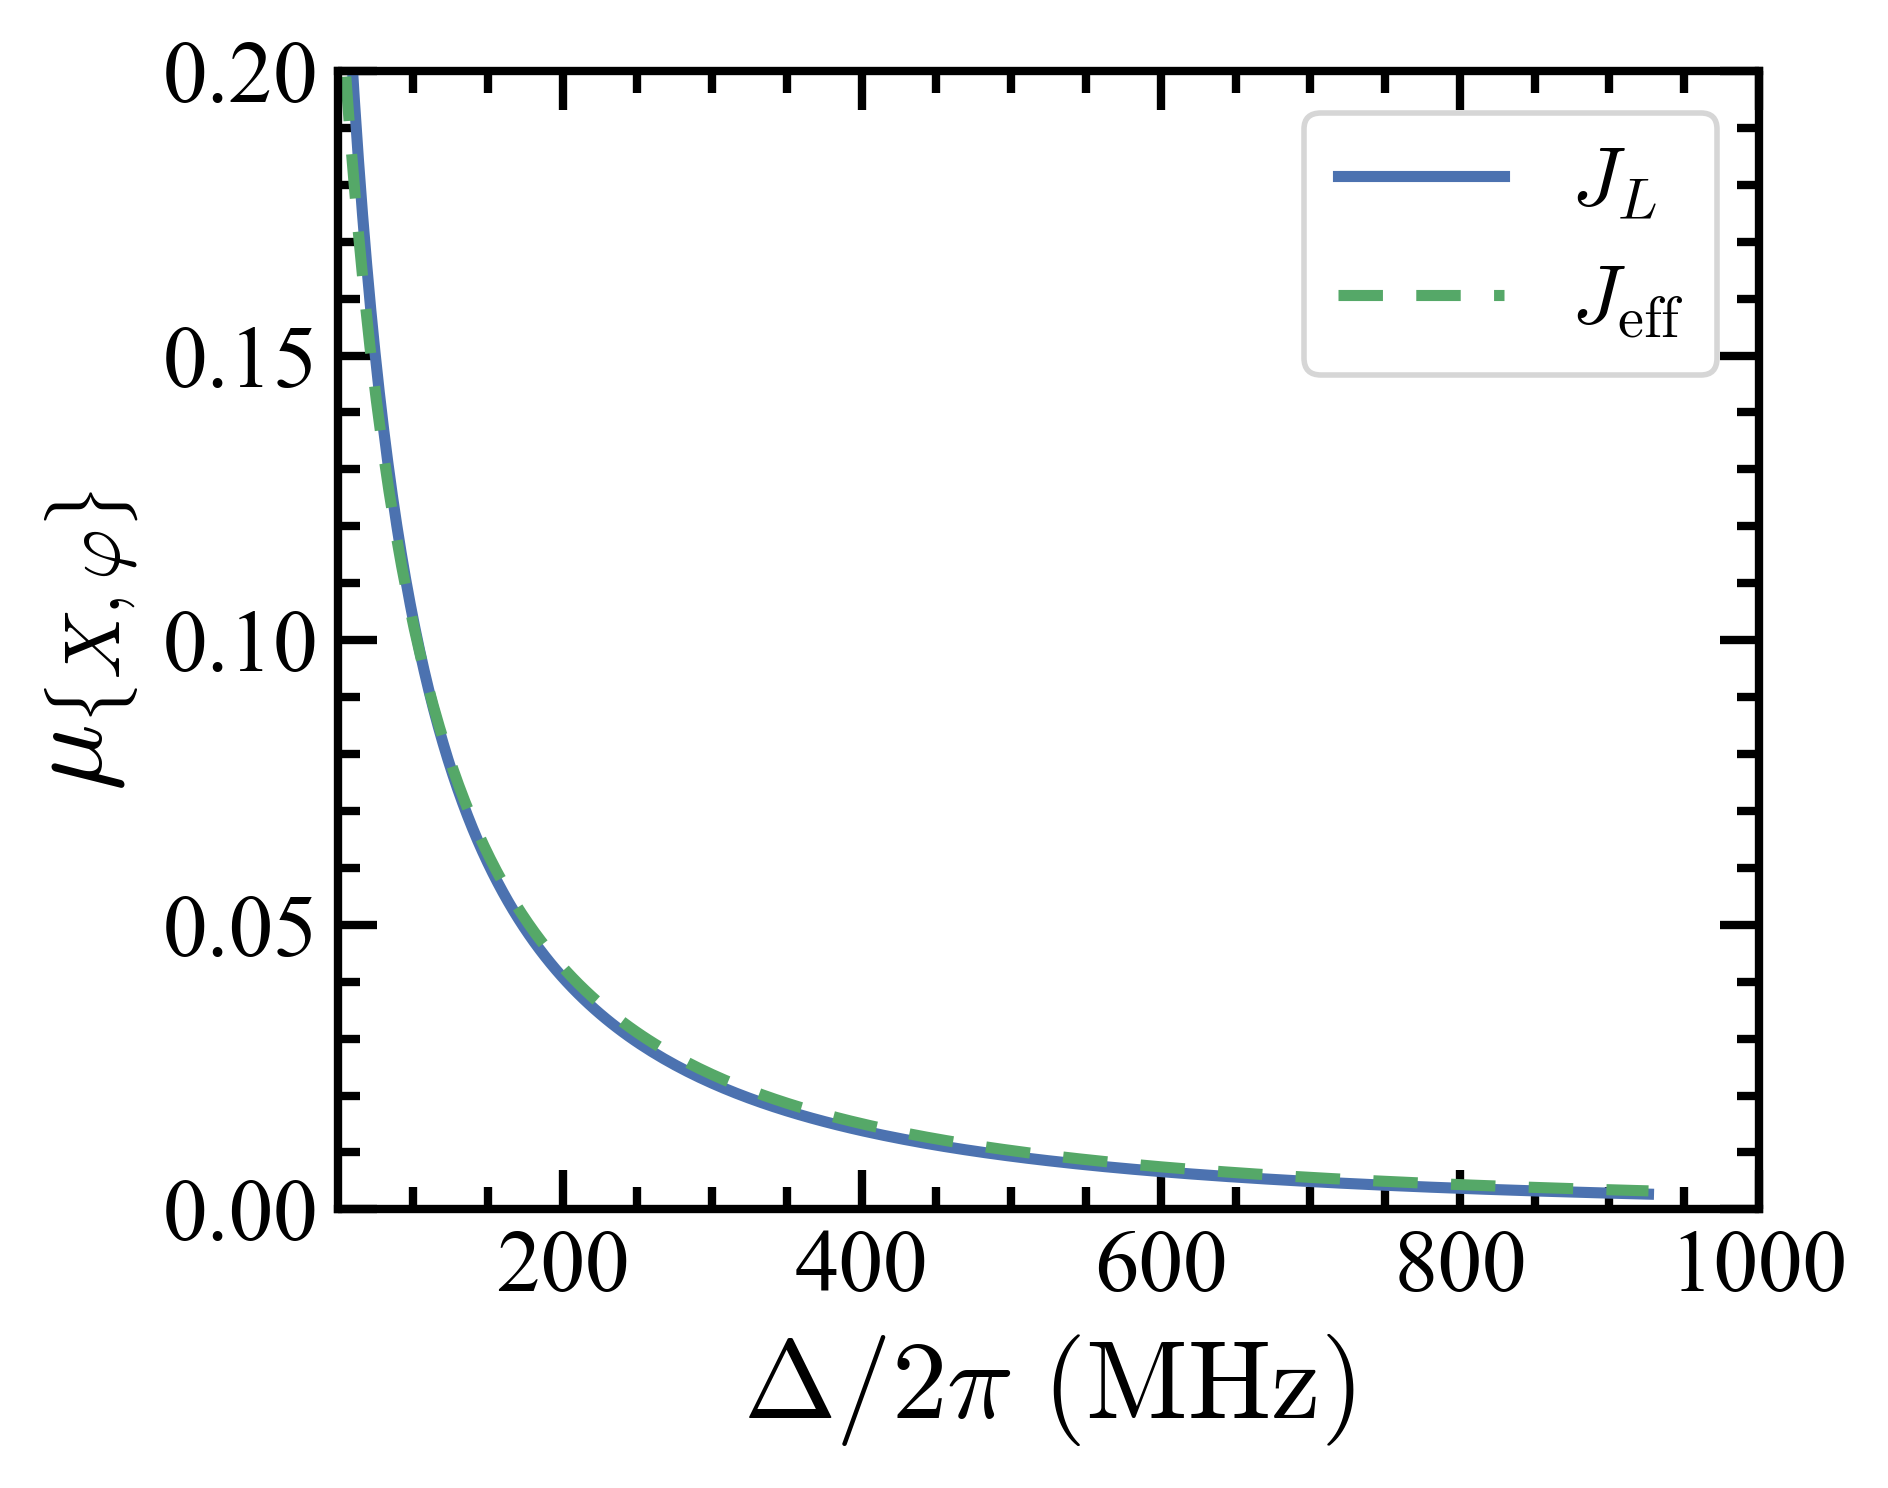

In [155]:
plt.figure(figsize=[5,4])
plt.plot(freq*1e3, mDual, label=r'$J_L$')
plt.plot(detuning_array*1e3, m,'--', label=r'$J_\mathrm{eff}$')
plt.xlim([50,1000])
plt.ylim([0,0.2])
plt.xlabel(r'$\Delta/2\pi~(\mathrm{MHz})$')
plt.ylabel(r'$\mu_{\{X,\varphi\}}$')
plt.legend()
plt.tight_layout()
# plt.legend()

figname = 'J_eff_mapping2.pdf'
plt.savefig(figpath+figname)